In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
Train_data = pd.read_csv('Train_Orig_Int.csv')
Validation_data = pd.read_csv('Valid_Orig_Int.csv')
Test_data = pd.read_csv('Test_Orig_Int.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         12000 non-null  int64  
 1   AnnualIncome                12000 non-null  int64  
 2   CreditScore                 12000 non-null  int64  
 3   EmploymentStatus            12000 non-null  int64  
 4   EducationLevel              12000 non-null  int64  
 5   Experience                  12000 non-null  int64  
 6   LoanAmount                  12000 non-null  int64  
 7   LoanDuration                12000 non-null  int64  
 8   MaritalStatus               12000 non-null  int64  
 9   NumberOfDependents          12000 non-null  int64  
 10  HomeOwnershipStatus         12000 non-null  int64  
 11  MonthlyDebtPayments         12000 non-null  int64  
 12  CreditCardUtilizationRate   12000 non-null  float64
 13  NumberOfOpenCreditLines     120

In [4]:
Train_data.head()

Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0   57         47030          511                 0               0   
1   31         44704          587                 0               3   
2   40         86684          609                 0               3   
3   59        207724          666                 0               2   
4   32         54324          574                 0               4   

   Experience  LoanAmount  LoanDuration  MaritalStatus  NumberOfDependents  \
0          35       15823            24              1                   2   
1           6       42377            84              1                   4   
2          18       17768            36              0                   4   
3          36       19782            60              1                   0   
4          12       37298            48              0                   1   

   ...  MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0  ...    2196.833333                    0.714049          2     34306   
1  ...    3725.333333                    0.720363          6     95930   
2  ...    7223.666667                    0.722829          2     36259   
3  ...   17310.333333                    0.906780          3     72339   
4  ...    4527.000000                    0.703866          4      9862   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.235323      0.260626          852.957015                0.572168   
1          0.273877      0.328652         1294.384120                0.429863   
2          0.198268      0.215082          674.055334                0.164329   
3          0.191782      0.184749          507.457337                0.052596   
4          0.245298      0.244149         1224.554472                0.390005   

   LoanApproved  RiskScore  
0             0       51.0  
1             0       50.0  
2             0       53.0  
3             1       33.6  
4             0       53.0  

[5 rows x 35 columns]

In [5]:
X_training = Train_data.drop('LoanApproved',axis=1)
y_training = Train_data['LoanApproved']

In [6]:
y_training.min()

0

In [7]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
y_validation = Validation_data['LoanApproved']

In [8]:
X_testing = Test_data.drop('LoanApproved',axis=1)
y_testing = Test_data['LoanApproved']

In [9]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [10]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [11]:
print(y_training)

[0 0 0 ... 1 0 0]


In [12]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.815122
1  0.805000
2  0.792499
3  0.783851
4  0.771832
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


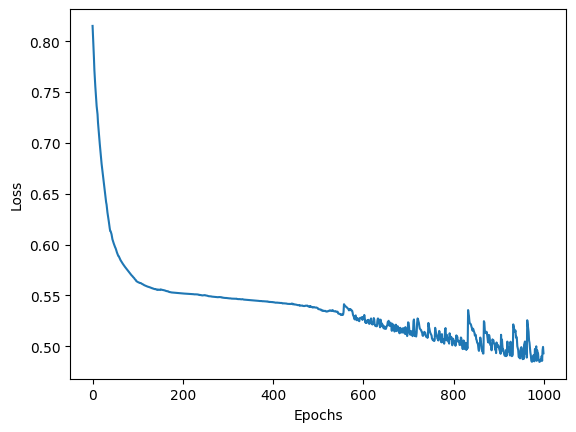

Training Losses are 
          0
0  1.173123
1  1.075619
2  1.056626
3  1.028841
4  1.006471
Validation Data
Confusion Matrix for hidden layer 16
[[2882  162]
 [ 541  415]]
Accuracy: 0.8243, Precision: 0.7192, Recall: 0.4341, F1-score: 0.5414

Test Data
Confusion Matrix for hiden layer 16
[[2881  163]
 [ 531  425]]
Accuracy: 0.8265, Precision: 0.7228, Recall: 0.4446, F1-score: 0.5505



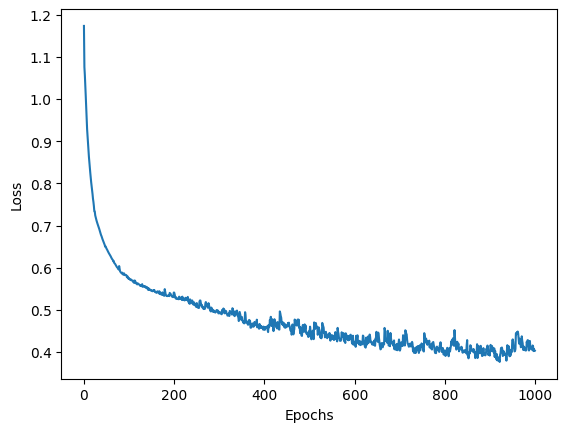

Training Losses are 
          0
0  0.624820
1  0.620057
2  0.615393
3  0.610136
4  0.606514
Validation Data
Confusion Matrix for hidden layer 32
[[2969   75]
 [ 580  376]]
Accuracy: 0.8363, Precision: 0.8337, Recall: 0.3933, F1-score: 0.5345

Test Data
Confusion Matrix for hiden layer 32
[[2975   69]
 [ 573  383]]
Accuracy: 0.8395, Precision: 0.8473, Recall: 0.4006, F1-score: 0.5440



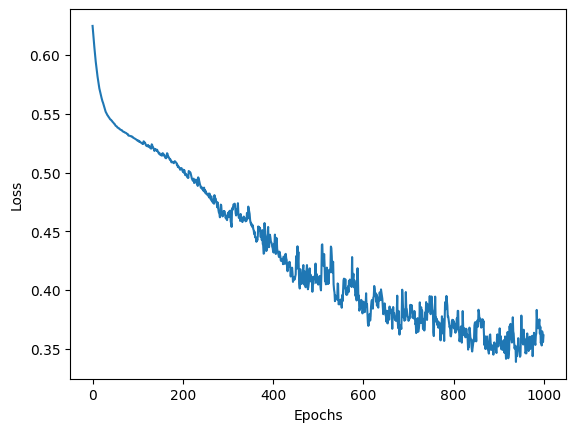

Training Losses are 
          0
0  0.708696
1  0.688545
2  0.667647
3  0.652290
4  0.639003
Validation Data
Confusion Matrix for hidden layer 64
[[2926  118]
 [ 536  420]]
Accuracy: 0.8365, Precision: 0.7807, Recall: 0.4393, F1-score: 0.5622

Test Data
Confusion Matrix for hiden layer 64
[[2923  121]
 [ 529  427]]
Accuracy: 0.8375, Precision: 0.7792, Recall: 0.4467, F1-score: 0.5678



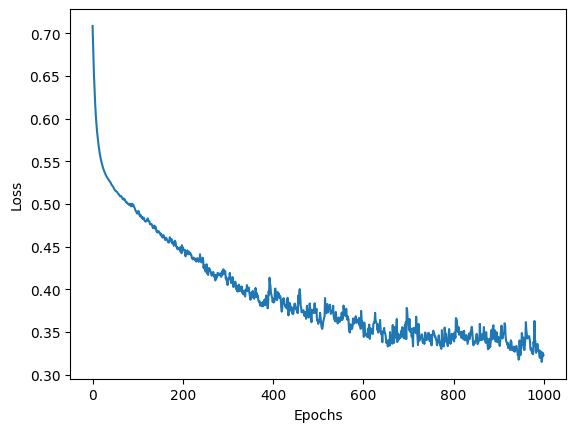

Training Losses are 
          0
0  0.711651
1  0.671854
2  0.640503
3  0.616884
4  0.600817
Validation Data
Confusion Matrix for hidden layer 128
[[2882  162]
 [ 426  530]]
Accuracy: 0.8530, Precision: 0.7659, Recall: 0.5544, F1-score: 0.6432

Test Data
Confusion Matrix for hiden layer 128
[[2887  157]
 [ 436  520]]
Accuracy: 0.8518, Precision: 0.7681, Recall: 0.5439, F1-score: 0.6369



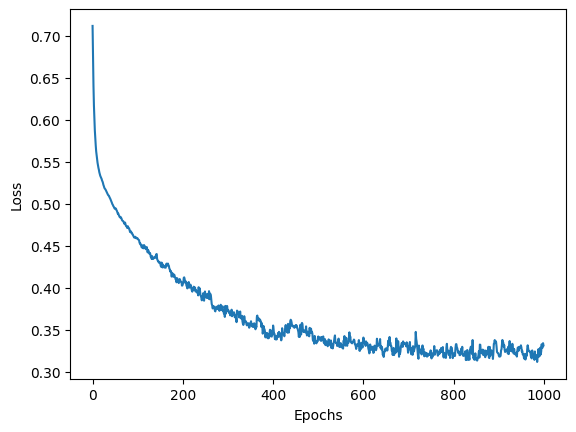

Minimum accuracy for test data is 0.761 for degree 8


In [22]:
nuerons = [8,16,32,64,128]
min_loss = 1000
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc < min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Minimum accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.592809
1  0.590929
2  0.589582
3  0.588163
4  0.586983
Validation Data
Confusion Matrix for hidden layer 8
[[2907  137]
 [ 406  550]]
Accuracy: 0.8642, Precision: 0.8006, Recall: 0.5753, F1-score: 0.6695

Test Data
Confusion Matrix for hiden layer 8
[[2902  142]
 [ 413  543]]
Accuracy: 0.8612, Precision: 0.7927, Recall: 0.5680, F1-score: 0.6618



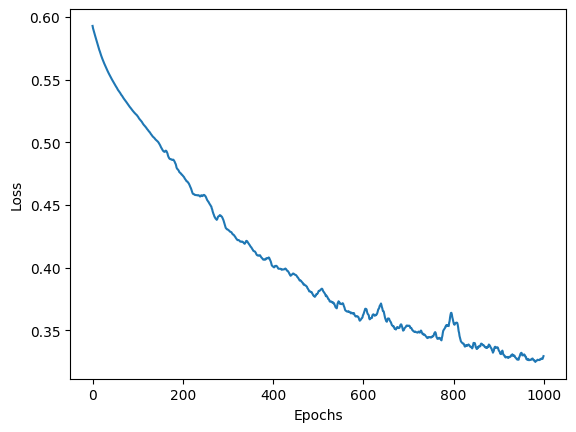

Training Losses are 
          0
0  0.784494
1  0.778038
2  0.771740
3  0.765427
4  0.759036
Validation Data
Confusion Matrix for hidden layer 16
[[2816  228]
 [ 321  635]]
Accuracy: 0.8628, Precision: 0.7358, Recall: 0.6642, F1-score: 0.6982

Test Data
Confusion Matrix for hiden layer 16
[[2829  215]
 [ 325  631]]
Accuracy: 0.8650, Precision: 0.7459, Recall: 0.6600, F1-score: 0.7003



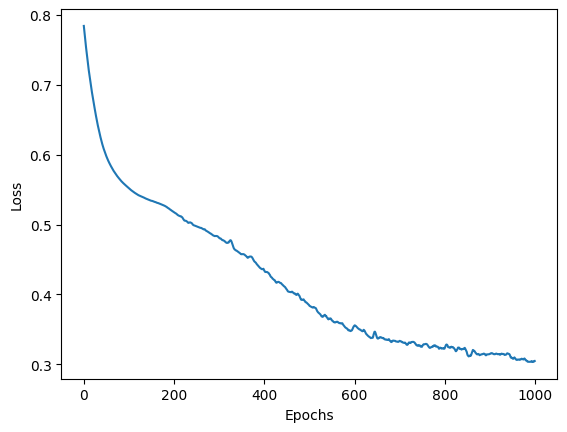

Training Losses are 
          0
0  0.621501
1  0.615861
2  0.610501
3  0.605344
4  0.600075
Validation Data
Confusion Matrix for hidden layer 32
[[2750  294]
 [ 246  710]]
Accuracy: 0.8650, Precision: 0.7072, Recall: 0.7427, F1-score: 0.7245

Test Data
Confusion Matrix for hiden layer 32
[[2759  285]
 [ 228  728]]
Accuracy: 0.8718, Precision: 0.7187, Recall: 0.7615, F1-score: 0.7395



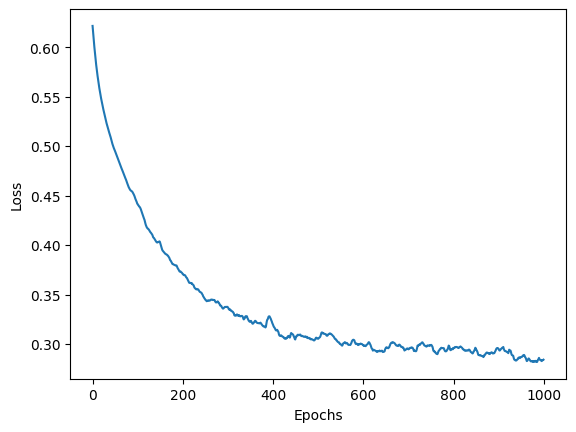

Training Losses are 
          0
0  0.800504
1  0.778987
2  0.759144
3  0.740221
4  0.722200
Validation Data
Confusion Matrix for hidden layer 64
[[2855  189]
 [ 340  616]]
Accuracy: 0.8678, Precision: 0.7652, Recall: 0.6444, F1-score: 0.6996

Test Data
Confusion Matrix for hiden layer 64
[[2854  190]
 [ 339  617]]
Accuracy: 0.8678, Precision: 0.7646, Recall: 0.6454, F1-score: 0.6999



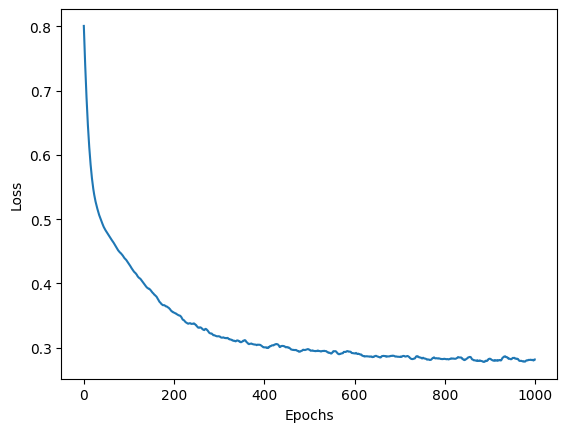

Training Losses are 
          0
0  0.761755
1  0.730923
2  0.702480
3  0.676741
4  0.653457
Validation Data
Confusion Matrix for hidden layer 128
[[2841  203]
 [ 312  644]]
Accuracy: 0.8712, Precision: 0.7603, Recall: 0.6736, F1-score: 0.7144

Test Data
Confusion Matrix for hiden layer 128
[[2845  199]
 [ 322  634]]
Accuracy: 0.8698, Precision: 0.7611, Recall: 0.6632, F1-score: 0.7088



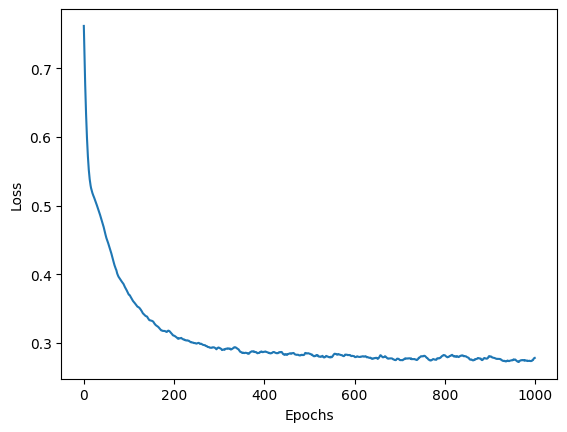

Best accuracy for test data is 0.86125 for degree 8


In [23]:
nuerons = [8,16,32,64,128]
min_loss = 1000
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc < min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [15]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.639643
1  0.638314
2  0.636875
3  0.635533
4  0.634307
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


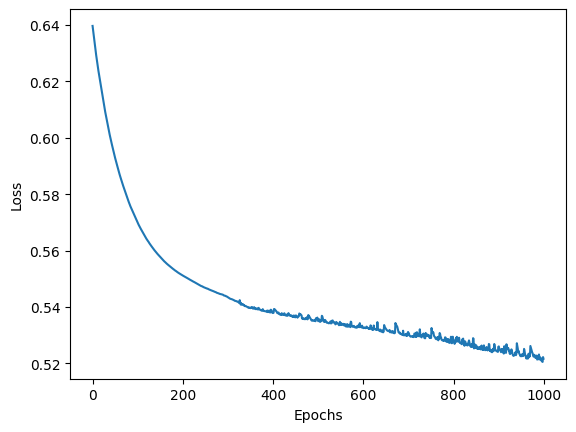

Training Losses are 
          0
0  0.745019
1  0.740011
2  0.735247
3  0.730861
4  0.726215
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


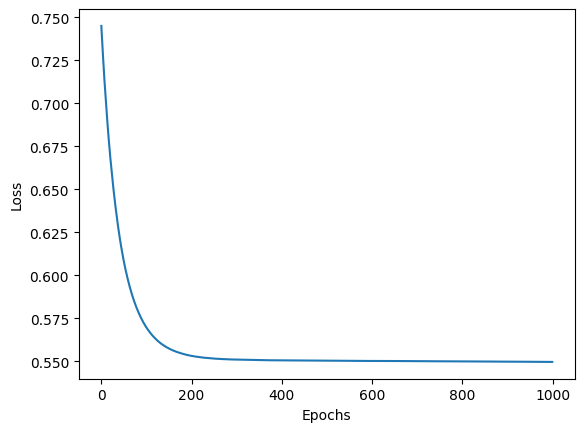

Training Losses are 
          0
0  0.823973
1  0.811311
2  0.799187
3  0.787766
4  0.776683
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


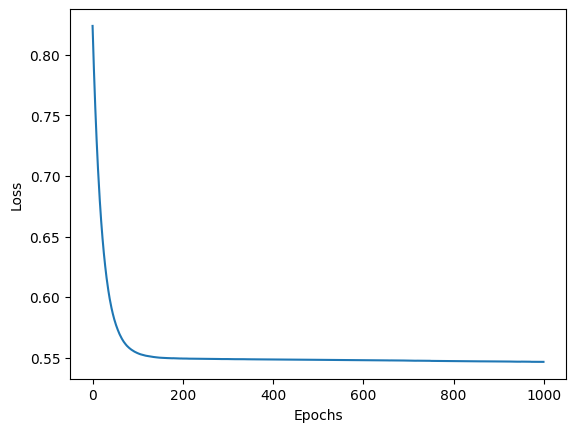

Training Losses are 
          0
0  0.742287
1  0.726287
2  0.711521
3  0.698081
4  0.685774
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


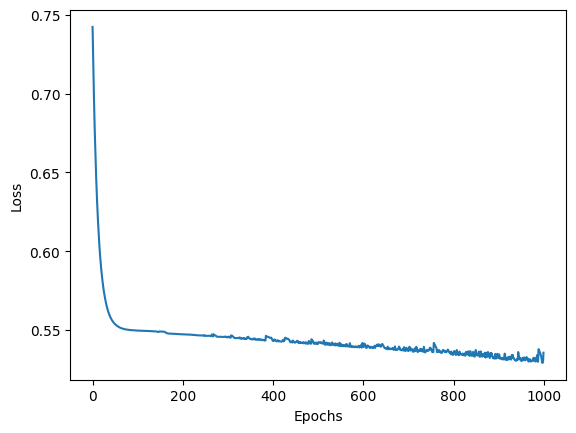

Training Losses are 
          0
0  0.758885
1  0.755264
2  0.751721
3  0.748236
4  0.744807
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


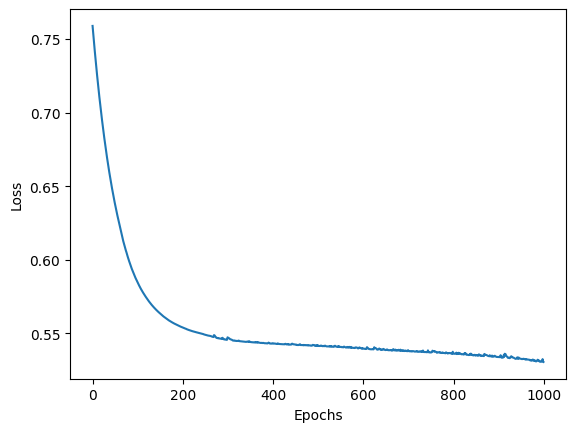

Training Losses are 
          0
0  0.611143
1  0.609675
2  0.608246
3  0.606852
4  0.605494
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


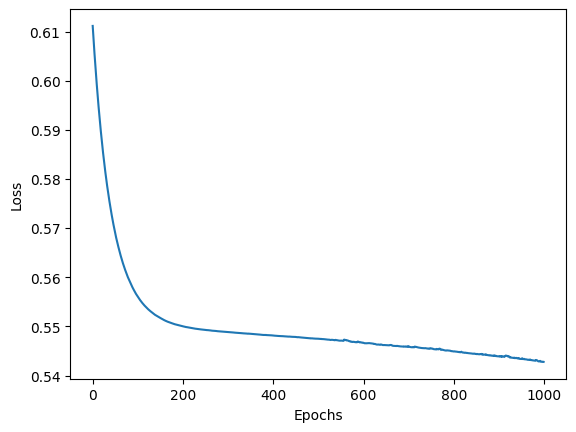

Training Losses are 
          0
0  0.706220
1  0.699184
2  0.692469
3  0.686021
4  0.679844
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


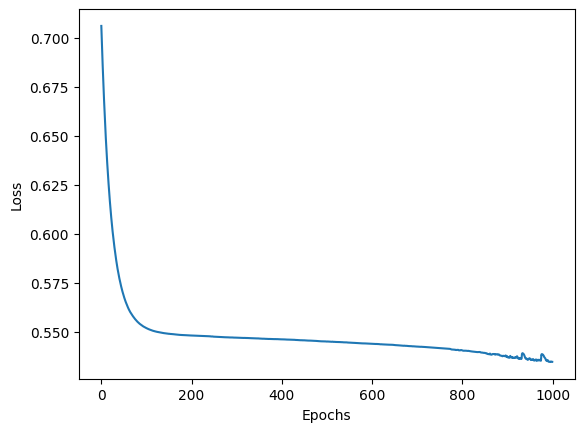

Training Losses are 
          0
0  0.642514
1  0.635561
2  0.629165
3  0.623306
4  0.617901
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


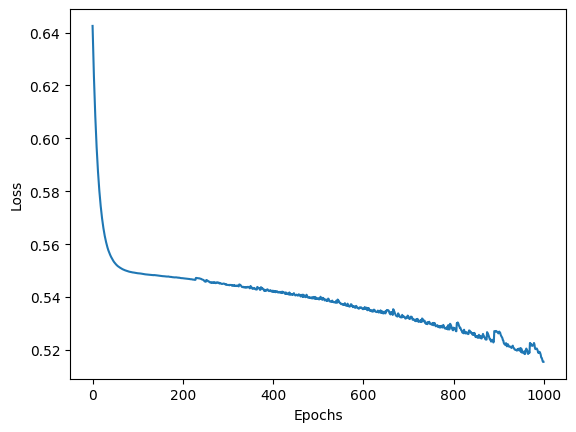

Training Losses are 
          0
0  0.790538
1  0.785840
2  0.781469
3  0.777212
4  0.773184
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


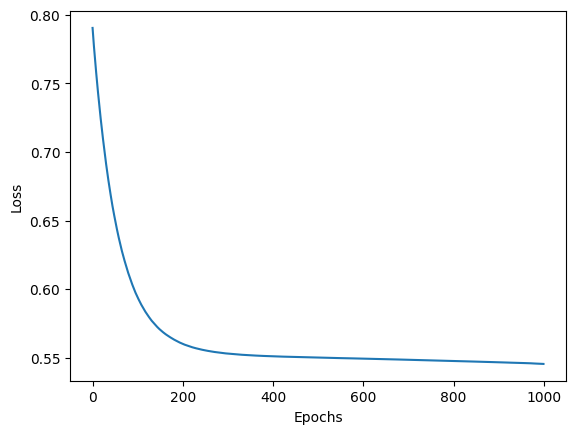

Training Losses are 
          0
0  0.764697
1  0.759304
2  0.754077
3  0.748980
4  0.744024
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


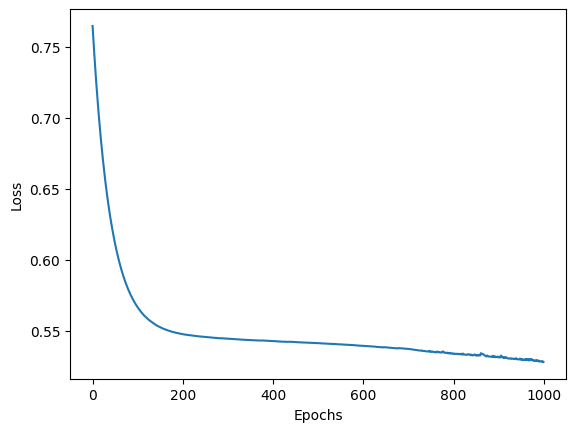

Training Losses are 
          0
0  0.740414
1  0.731782
2  0.723405
3  0.715578
4  0.708198
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


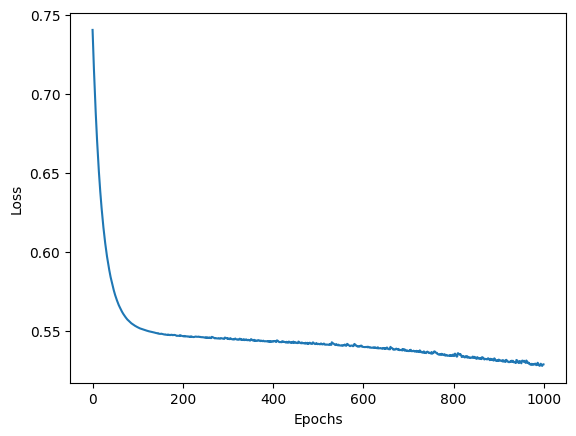

Training Losses are 
          0
0  0.764212
1  0.745426
2  0.728125
3  0.712490
4  0.698226
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


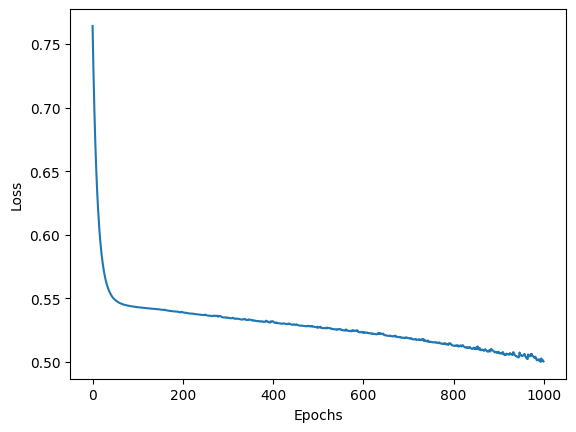

Training Losses are 
          0
0  0.681434
1  0.678827
2  0.676302
3  0.673798
4  0.671333
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


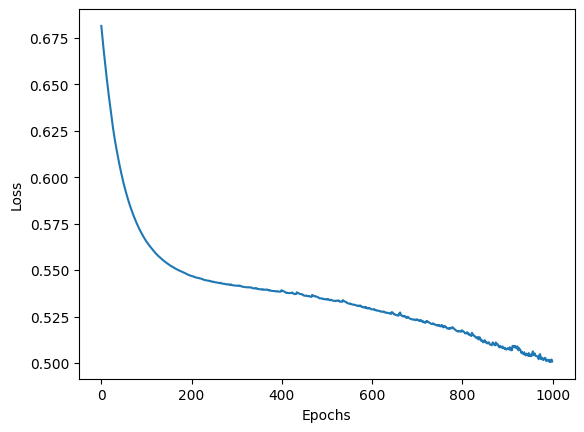

Training Losses are 
          0
0  0.791441
1  0.784974
2  0.778705
3  0.772630
4  0.766778
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


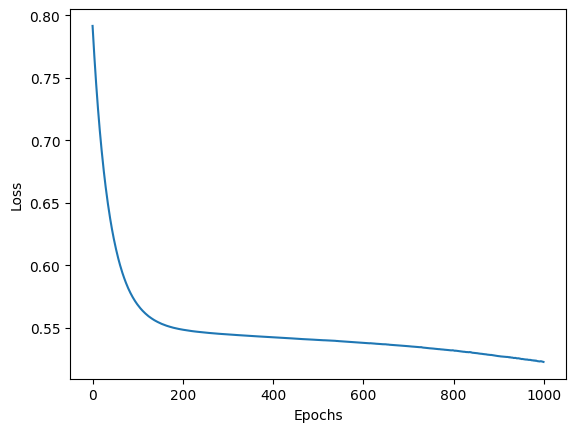

Training Losses are 
          0
0  0.573817
1  0.572710
2  0.571639
3  0.570602
4  0.569625
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Losses are 
          0
0  0.597491
1  0.593879
2  0.590556
3  0.587478
4  0.584639
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


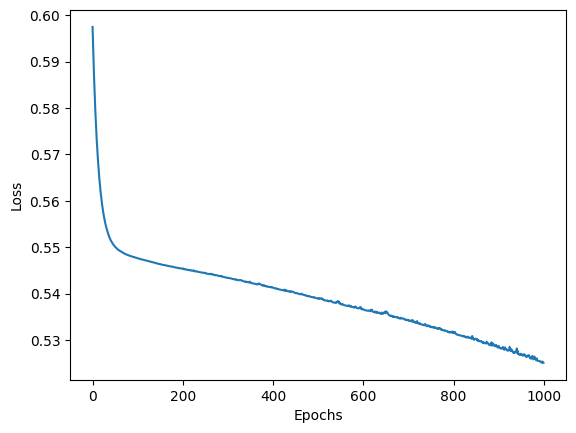

In [16]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

Training Losses are 
          0
0  0.759357
1  0.756617
2  0.754059
3  0.751524
4  0.749104
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


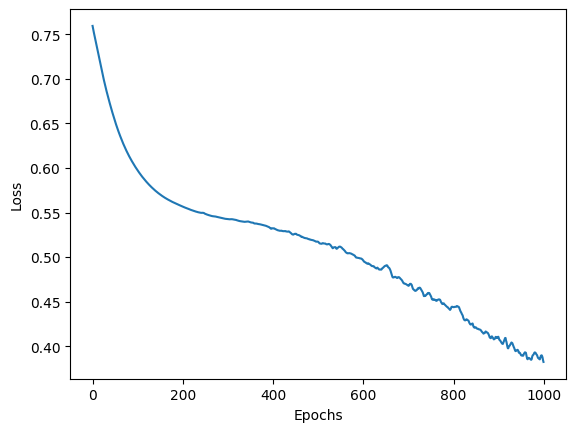

Training Losses are 
          0
0  0.576417
1  0.574962
2  0.573655
3  0.572358
4  0.571085
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2743  301]
 [ 243  713]]
Accuracy: 0.8640, Precision: 0.7032, Recall: 0.7458, F1-score: 0.7239

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2750  294]
 [ 245  711]]
Accuracy: 0.8652, Precision: 0.7075, Recall: 0.7437, F1-score: 0.7251



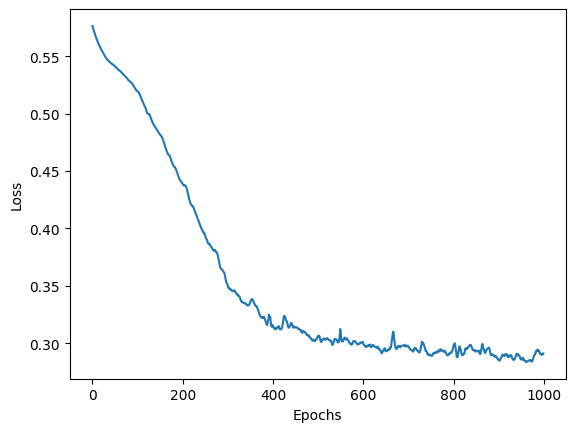

Training Losses are 
          0
0  0.700025
1  0.694541
2  0.689206
3  0.683966
4  0.678859
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2708  336]
 [ 208  748]]
Accuracy: 0.8640, Precision: 0.6900, Recall: 0.7824, F1-score: 0.7333

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2702  342]
 [ 196  760]]
Accuracy: 0.8655, Precision: 0.6897, Recall: 0.7950, F1-score: 0.7386



Training Losses are 
          0
0  0.715567
1  0.704720
2  0.694294
3  0.684288
4  0.674639
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2733  311]
 [ 236  720]]
Accuracy: 0.8632, Precision: 0.6984, Recall: 0.7531, F1-score: 0.7247

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2722  322]
 [ 261  695]]
Accuracy: 0.8542, Precision: 0.6834, Recall: 0.7270, F1-score: 0.7045



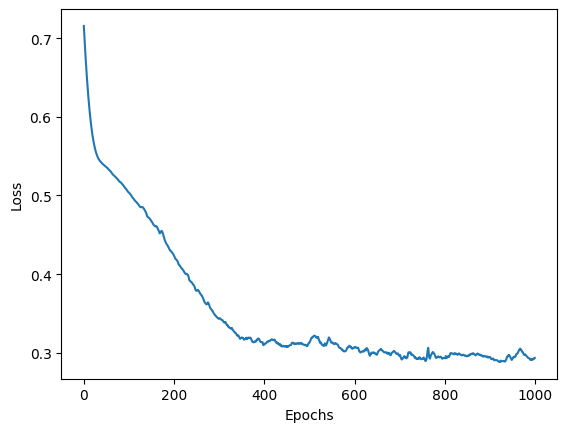

Training Losses are 
          0
0  0.812014
1  0.808017
2  0.804136
3  0.800310
4  0.796669
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[2834  210]
 [ 314  642]]
Accuracy: 0.8690, Precision: 0.7535, Recall: 0.6715, F1-score: 0.7102

Test Data
Confusion Matrix for hiden layer 16 and 8
[[2842  202]
 [ 315  641]]
Accuracy: 0.8708, Precision: 0.7604, Recall: 0.6705, F1-score: 0.7126



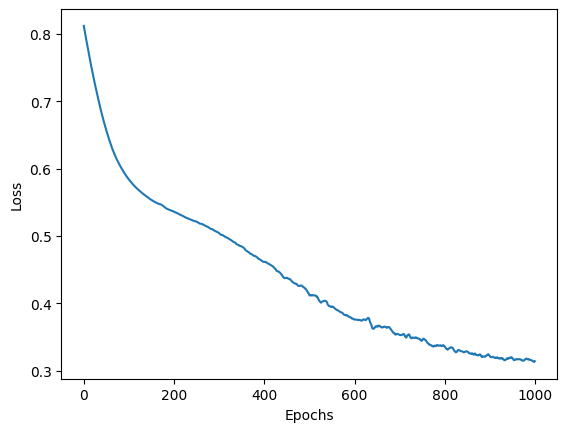

Training Losses are 
          0
0  0.755795
1  0.751448
2  0.747191
3  0.742898
4  0.738638
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2834  210]
 [ 316  640]]
Accuracy: 0.8685, Precision: 0.7529, Recall: 0.6695, F1-score: 0.7087

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2840  204]
 [ 309  647]]
Accuracy: 0.8718, Precision: 0.7603, Recall: 0.6768, F1-score: 0.7161



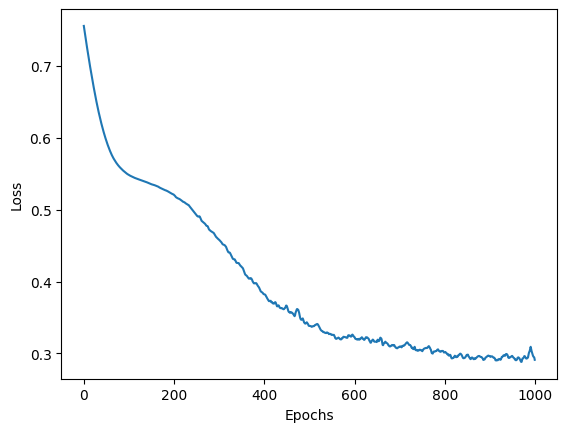

Training Losses are 
          0
0  0.696221
1  0.689386
2  0.682794
3  0.676542
4  0.670454
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2615  429]
 [ 160  796]]
Accuracy: 0.8528, Precision: 0.6498, Recall: 0.8326, F1-score: 0.7299

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2598  446]
 [ 171  785]]
Accuracy: 0.8458, Precision: 0.6377, Recall: 0.8211, F1-score: 0.7179



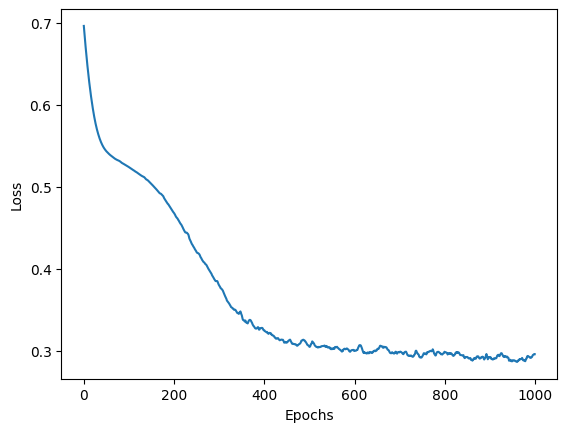

Training Losses are 
          0
0  0.796018
1  0.781228
2  0.766956
3  0.753178
4  0.739949
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2778  266]
 [ 276  680]]
Accuracy: 0.8645, Precision: 0.7188, Recall: 0.7113, F1-score: 0.7150

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2795  249]
 [ 298  658]]
Accuracy: 0.8632, Precision: 0.7255, Recall: 0.6883, F1-score: 0.7064



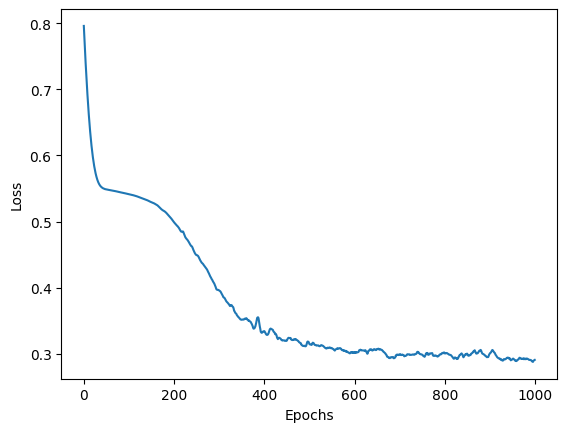

Training Losses are 
          0
0  0.874361
1  0.869480
2  0.864715
3  0.859993
4  0.855372
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2767  277]
 [ 246  710]]
Accuracy: 0.8692, Precision: 0.7194, Recall: 0.7427, F1-score: 0.7308

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2759  285]
 [ 252  704]]
Accuracy: 0.8658, Precision: 0.7118, Recall: 0.7364, F1-score: 0.7239



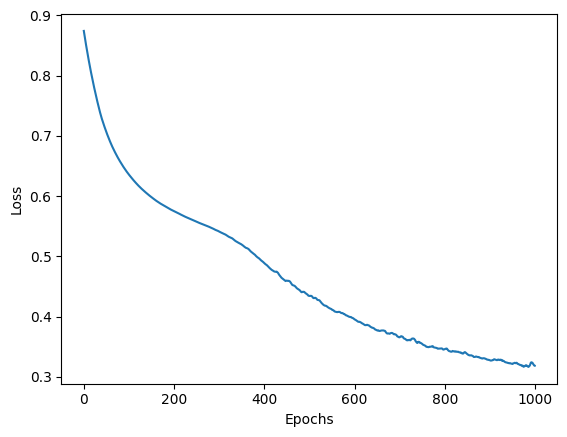

Training Losses are 
          0
0  0.716836
1  0.710921
2  0.705249
3  0.699666
4  0.694210
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2801  243]
 [ 291  665]]
Accuracy: 0.8665, Precision: 0.7324, Recall: 0.6956, F1-score: 0.7135

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2799  245]
 [ 292  664]]
Accuracy: 0.8658, Precision: 0.7305, Recall: 0.6946, F1-score: 0.7121



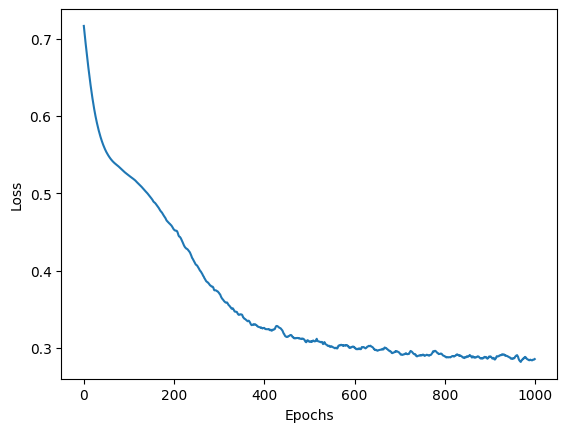

Training Losses are 
          0
0  0.660155
1  0.653530
2  0.647139
3  0.641027
4  0.635149
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2832  212]
 [ 285  671]]
Accuracy: 0.8758, Precision: 0.7599, Recall: 0.7019, F1-score: 0.7297

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2811  233]
 [ 310  646]]
Accuracy: 0.8642, Precision: 0.7349, Recall: 0.6757, F1-score: 0.7041



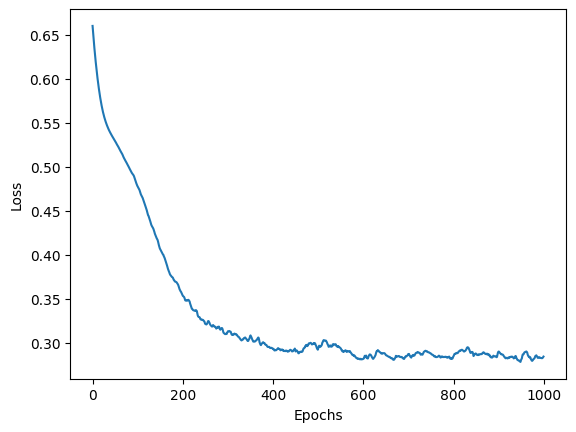

Training Losses are 
          0
0  0.678929
1  0.666118
2  0.653941
3  0.642531
4  0.631949
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2888  156]
 [ 380  576]]
Accuracy: 0.8660, Precision: 0.7869, Recall: 0.6025, F1-score: 0.6825

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2877  167]
 [ 370  586]]
Accuracy: 0.8658, Precision: 0.7782, Recall: 0.6130, F1-score: 0.6858



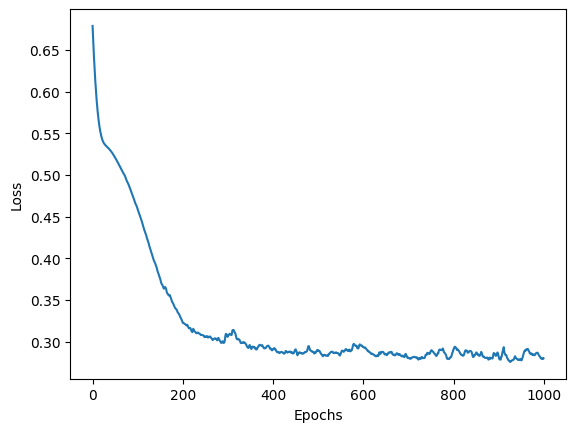

Training Losses are 
          0
0  0.666183
1  0.661481
2  0.656992
3  0.652643
4  0.648354
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2808  236]
 [ 267  689]]
Accuracy: 0.8742, Precision: 0.7449, Recall: 0.7207, F1-score: 0.7326

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2794  250]
 [ 277  679]]
Accuracy: 0.8682, Precision: 0.7309, Recall: 0.7103, F1-score: 0.7204



Training Losses are 
          0
0  0.702610
1  0.694477
2  0.686660
3  0.679083
4  0.671810
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2847  197]
 [ 326  630]]
Accuracy: 0.8692, Precision: 0.7618, Recall: 0.6590, F1-score: 0.7067

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2839  205]
 [ 329  627]]
Accuracy: 0.8665, Precision: 0.7536, Recall: 0.6559, F1-score: 0.7013



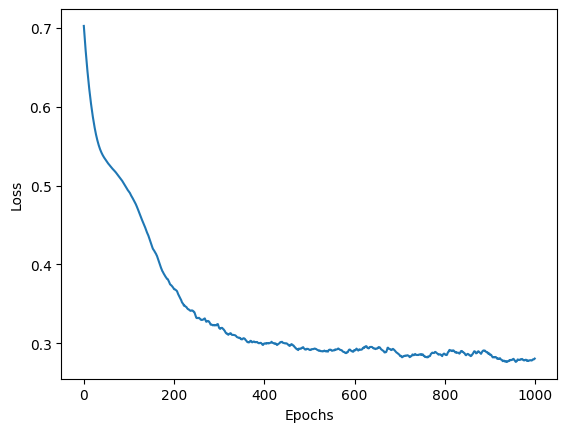

Training Losses are 
          0
0  0.825315
1  0.811489
2  0.798055
3  0.784946
4  0.772260
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2775  269]
 [ 261  695]]
Accuracy: 0.8675, Precision: 0.7210, Recall: 0.7270, F1-score: 0.7240

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2773  271]
 [ 248  708]]
Accuracy: 0.8702, Precision: 0.7232, Recall: 0.7406, F1-score: 0.7318



Training Losses are 
          0
0  0.646412
1  0.632486
2  0.619714
3  0.608067
4  0.597553
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2779  265]
 [ 249  707]]
Accuracy: 0.8715, Precision: 0.7274, Recall: 0.7395, F1-score: 0.7334

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2778  266]
 [ 257  699]]
Accuracy: 0.8692, Precision: 0.7244, Recall: 0.7312, F1-score: 0.7277



In [19]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [18]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.777227
1  0.774932
2  0.772614
3  0.770267
4  0.767965
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[2837  207]
 [ 319  637]]
Accuracy: 0.8685, Precision: 0.7547, Recall: 0.6663, F1-score: 0.7078

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[2842  202]
 [ 322  634]]
Accuracy: 0.8690, Precision: 0.7584, Recall: 0.6632, F1-score: 0.7076



Training Losses are 
          0
0  0.975571
1  0.972622
2  0.969758
3  0.966922
4  0.964117
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


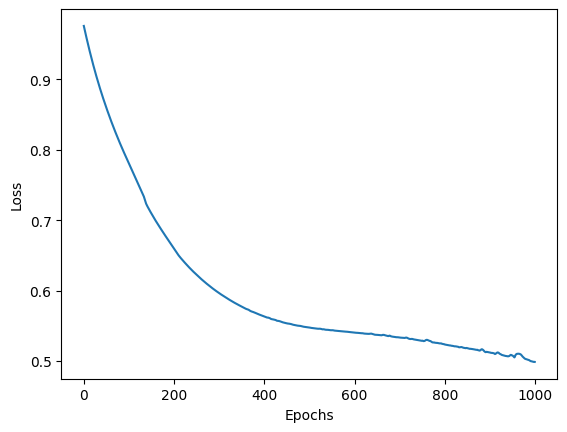

Training Losses are 
          0
0  0.787455
1  0.784212
2  0.781171
3  0.778123
4  0.775193
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[2771  273]
 [ 255  701]]
Accuracy: 0.8680, Precision: 0.7197, Recall: 0.7333, F1-score: 0.7264

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[2767  277]
 [ 259  697]]
Accuracy: 0.8660, Precision: 0.7156, Recall: 0.7291, F1-score: 0.7223



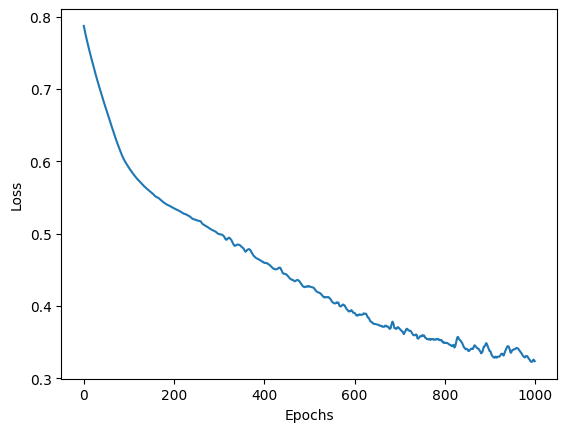

Training Losses are 
          0
0  0.846340
1  0.843520
2  0.840686
3  0.837912
4  0.835089
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2804  240]
 [ 304  652]]
Accuracy: 0.8640, Precision: 0.7309, Recall: 0.6820, F1-score: 0.7056

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2811  233]
 [ 307  649]]
Accuracy: 0.8650, Precision: 0.7358, Recall: 0.6789, F1-score: 0.7062



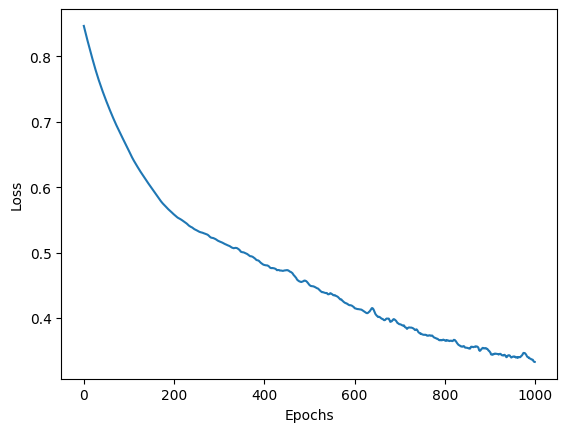

Training Losses are 
          0
0  0.786056
1  0.780993
2  0.776004
3  0.771079
4  0.766337
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2640  404]
 [ 160  796]]
Accuracy: 0.8590, Precision: 0.6633, Recall: 0.8326, F1-score: 0.7384

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2635  409]
 [ 167  789]]
Accuracy: 0.8560, Precision: 0.6586, Recall: 0.8253, F1-score: 0.7326



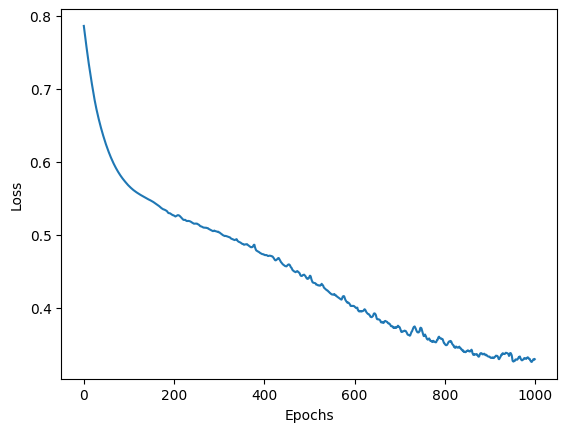

Training Losses are 
          0
0  0.599292
1  0.597565
2  0.595827
3  0.594181
4  0.592574
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2917  127]
 [ 456  500]]
Accuracy: 0.8542, Precision: 0.7974, Recall: 0.5230, F1-score: 0.6317

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2903  141]
 [ 451  505]]
Accuracy: 0.8520, Precision: 0.7817, Recall: 0.5282, F1-score: 0.6305



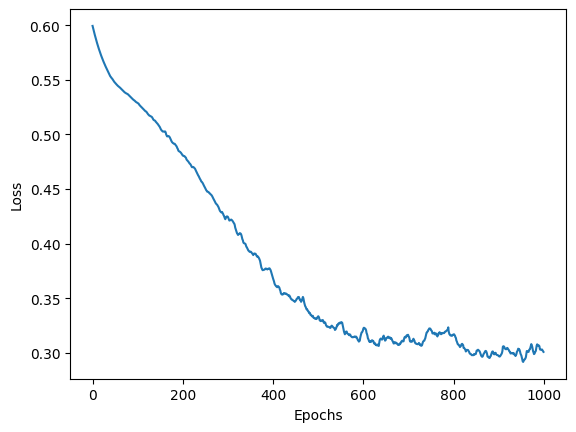

Training Losses are 
          0
0  0.747347
1  0.743432
2  0.739622
3  0.735823
4  0.732014
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2818  226]
 [ 282  674]]
Accuracy: 0.8730, Precision: 0.7489, Recall: 0.7050, F1-score: 0.7263

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2796  248]
 [ 288  668]]
Accuracy: 0.8660, Precision: 0.7293, Recall: 0.6987, F1-score: 0.7137



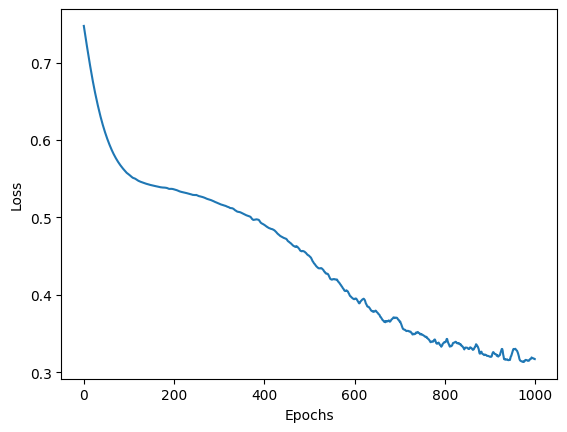

Training Losses are 
          0
0  0.626444
1  0.624216
2  0.622038
3  0.619880
4  0.617783
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2725  319]
 [ 242  714]]
Accuracy: 0.8598, Precision: 0.6912, Recall: 0.7469, F1-score: 0.7179

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2738  306]
 [ 249  707]]
Accuracy: 0.8612, Precision: 0.6979, Recall: 0.7395, F1-score: 0.7181



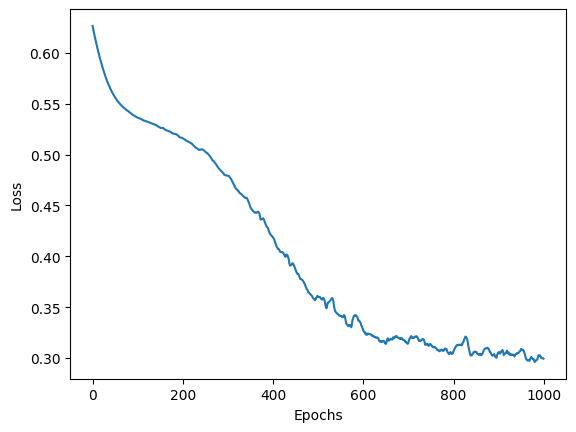

Training Losses are 
          0
0  0.589569
1  0.586563
2  0.583641
3  0.580918
4  0.578402
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2767  277]
 [ 275  681]]
Accuracy: 0.8620, Precision: 0.7109, Recall: 0.7123, F1-score: 0.7116

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2775  269]
 [ 274  682]]
Accuracy: 0.8642, Precision: 0.7171, Recall: 0.7134, F1-score: 0.7153



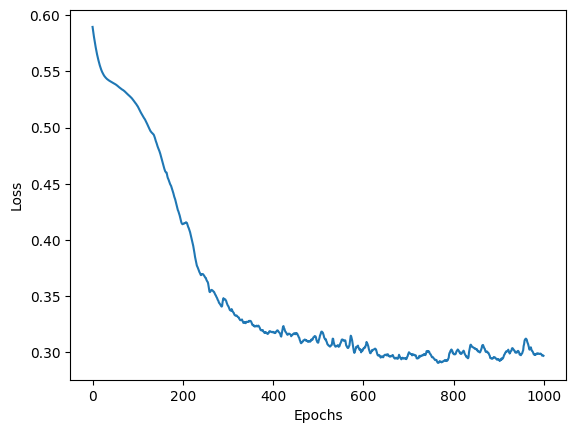

Training Losses are 
          0
0  0.731678
1  0.725001
2  0.718454
3  0.711976
4  0.705663
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2777  267]
 [ 270  686]]
Accuracy: 0.8658, Precision: 0.7198, Recall: 0.7176, F1-score: 0.7187

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2786  258]
 [ 273  683]]
Accuracy: 0.8672, Precision: 0.7258, Recall: 0.7144, F1-score: 0.7201



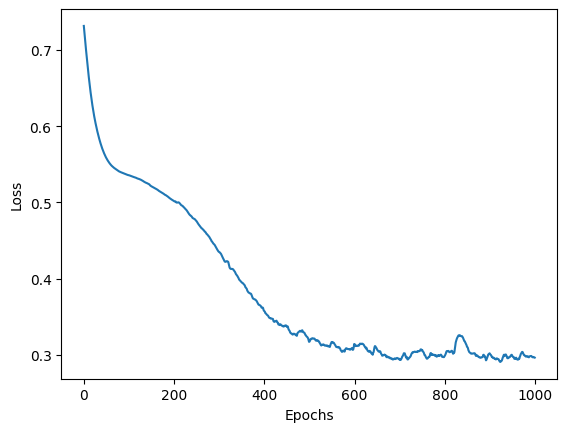

Training Losses are 
          0
0  0.698923
1  0.693208
2  0.687610
3  0.682106
4  0.676780
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2657  387]
 [ 191  765]]
Accuracy: 0.8555, Precision: 0.6641, Recall: 0.8002, F1-score: 0.7258

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2648  396]
 [ 178  778]]
Accuracy: 0.8565, Precision: 0.6627, Recall: 0.8138, F1-score: 0.7305



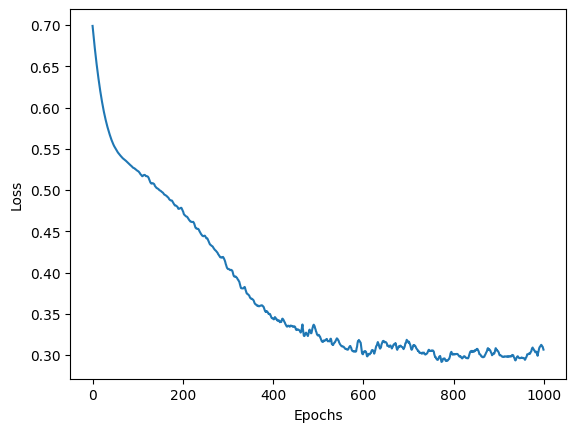

Training Losses are 
          0
0  0.588562
1  0.584555
2  0.580721
3  0.577078
4  0.573778
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2789  255]
 [ 290  666]]
Accuracy: 0.8638, Precision: 0.7231, Recall: 0.6967, F1-score: 0.7096

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2798  246]
 [ 295  661]]
Accuracy: 0.8648, Precision: 0.7288, Recall: 0.6914, F1-score: 0.7096



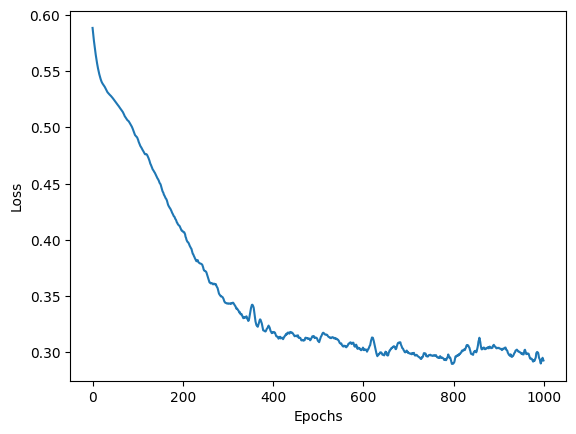

Training Losses are 
          0
0  0.829864
1  0.816607
2  0.803723
3  0.791161
4  0.778943
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2905  139]
 [ 418  538]]
Accuracy: 0.8608, Precision: 0.7947, Recall: 0.5628, F1-score: 0.6589

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2903  141]
 [ 410  546]]
Accuracy: 0.8622, Precision: 0.7948, Recall: 0.5711, F1-score: 0.6646



Training Losses are 
          0
0  0.807393
1  0.794004
2  0.780984
3  0.768348
4  0.756108
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2675  369]
 [ 206  750]]
Accuracy: 0.8562, Precision: 0.6702, Recall: 0.7845, F1-score: 0.7229

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2664  380]
 [ 196  760]]
Accuracy: 0.8560, Precision: 0.6667, Recall: 0.7950, F1-score: 0.7252



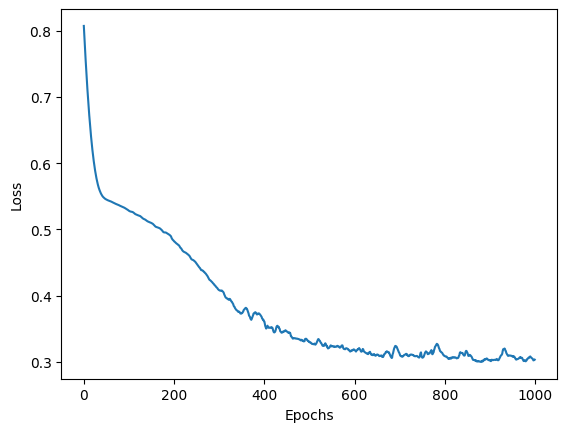

Training Losses are 
          0
0  0.803958
1  0.790105
2  0.776660
3  0.763630
4  0.751026
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2718  326]
 [ 226  730]]
Accuracy: 0.8620, Precision: 0.6913, Recall: 0.7636, F1-score: 0.7256

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2732  312]
 [ 205  751]]
Accuracy: 0.8708, Precision: 0.7065, Recall: 0.7856, F1-score: 0.7439



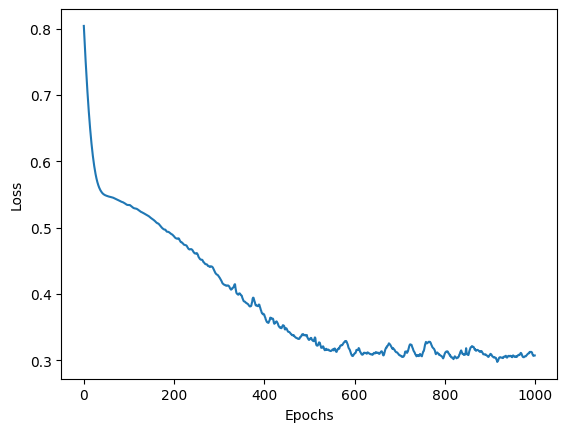

Training Losses are 
          0
0  0.708652
1  0.697737
2  0.687267
3  0.677229
4  0.667623
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2944  100]
 [ 531  425]]
Accuracy: 0.8423, Precision: 0.8095, Recall: 0.4446, F1-score: 0.5739

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2945   99]
 [ 526  430]]
Accuracy: 0.8438, Precision: 0.8129, Recall: 0.4498, F1-score: 0.5791



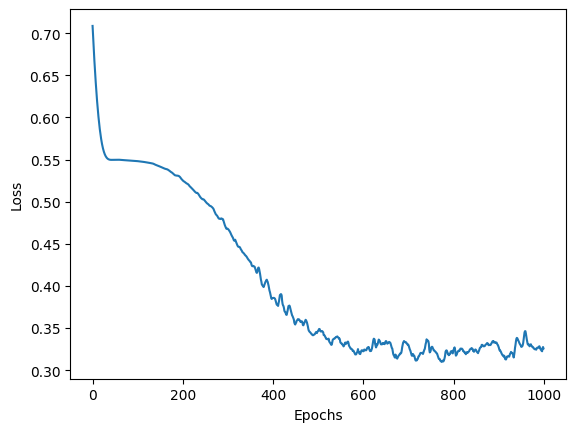

Training Losses are 
          0
0  0.757778
1  0.755080
2  0.752339
3  0.749653
4  0.746921
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2696  348]
 [ 199  757]]
Accuracy: 0.8632, Precision: 0.6851, Recall: 0.7918, F1-score: 0.7346

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2708  336]
 [ 213  743]]
Accuracy: 0.8628, Precision: 0.6886, Recall: 0.7772, F1-score: 0.7302



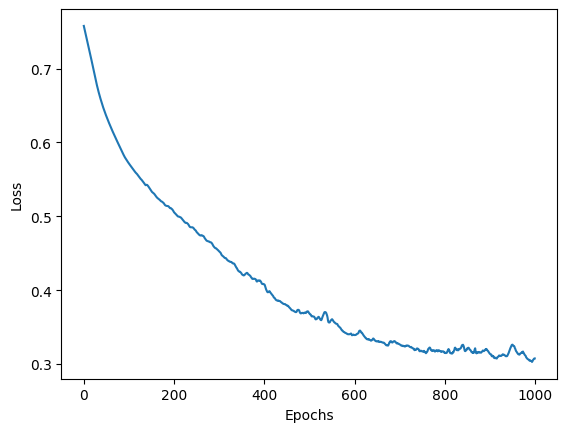

Training Losses are 
          0
0  0.850992
1  0.847192
2  0.843492
3  0.839783
4  0.836121
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2782  262]
 [ 271  685]]
Accuracy: 0.8668, Precision: 0.7233, Recall: 0.7165, F1-score: 0.7199

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2781  263]
 [ 268  688]]
Accuracy: 0.8672, Precision: 0.7234, Recall: 0.7197, F1-score: 0.7216



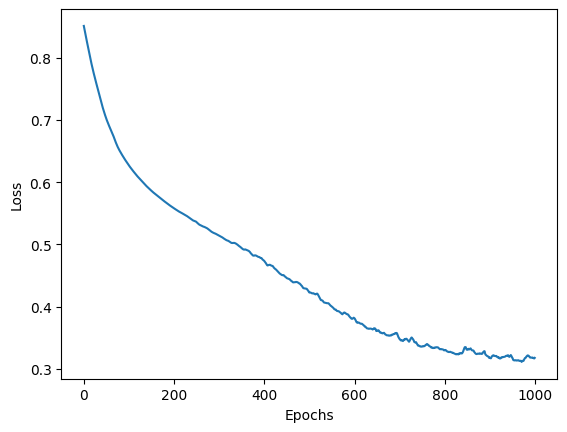

Training Losses are 
          0
0  0.862358
1  0.859071
2  0.855696
3  0.852296
4  0.848919
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2815  229]
 [ 294  662]]
Accuracy: 0.8692, Precision: 0.7430, Recall: 0.6925, F1-score: 0.7168

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2829  215]
 [ 294  662]]
Accuracy: 0.8728, Precision: 0.7548, Recall: 0.6925, F1-score: 0.7223



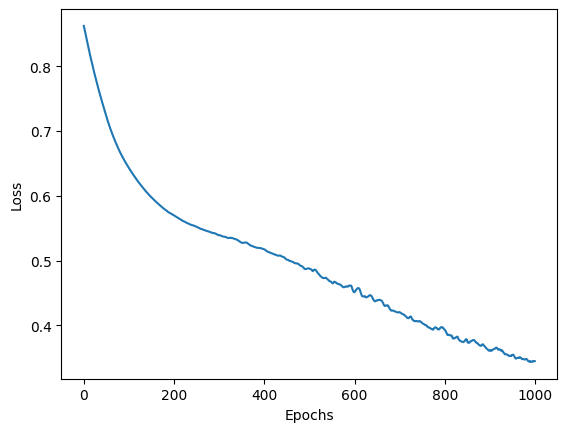

Training Losses are 
          0
0  0.821690
1  0.818724
2  0.815744
3  0.812747
4  0.809736
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2858  186]
 [ 325  631]]
Accuracy: 0.8722, Precision: 0.7723, Recall: 0.6600, F1-score: 0.7118

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2873  171]
 [ 352  604]]
Accuracy: 0.8692, Precision: 0.7794, Recall: 0.6318, F1-score: 0.6979



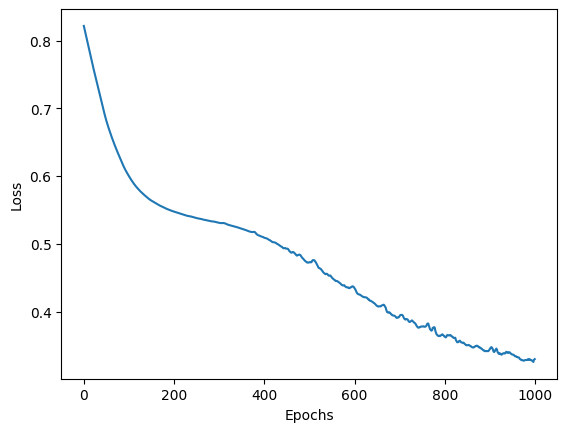

Training Losses are 
          0
0  0.665905
1  0.662257
2  0.658753
3  0.655350
4  0.651916
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2821  223]
 [ 303  653]]
Accuracy: 0.8685, Precision: 0.7454, Recall: 0.6831, F1-score: 0.7129

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2826  218]
 [ 290  666]]
Accuracy: 0.8730, Precision: 0.7534, Recall: 0.6967, F1-score: 0.7239



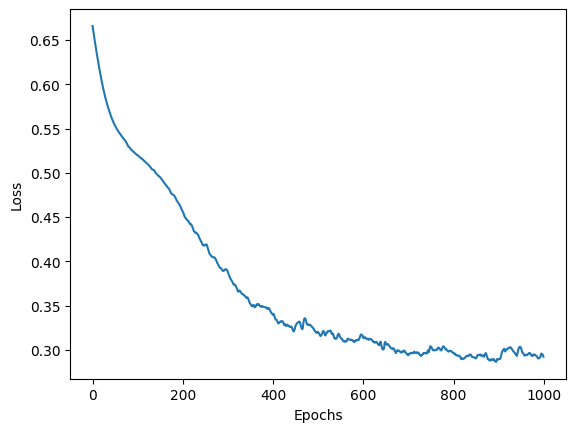

Training Losses are 
          0
0  0.686526
1  0.682704
2  0.678898
3  0.675134
4  0.671447
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2771  273]
 [ 278  678]]
Accuracy: 0.8622, Precision: 0.7129, Recall: 0.7092, F1-score: 0.7111

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2754  290]
 [ 273  683]]
Accuracy: 0.8592, Precision: 0.7020, Recall: 0.7144, F1-score: 0.7081



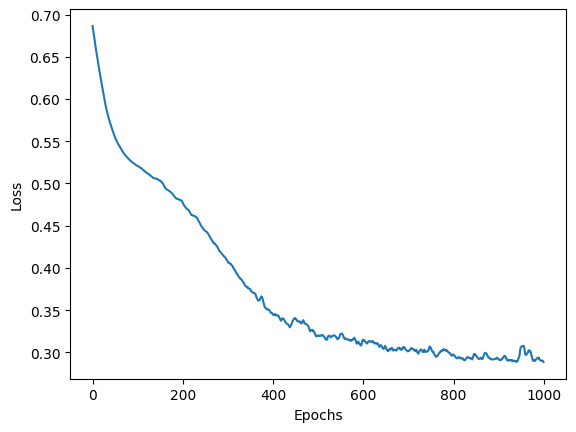

Training Losses are 
          0
0  0.776790
1  0.771731
2  0.766830
3  0.762101
4  0.757501
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2777  267]
 [ 293  663]]
Accuracy: 0.8600, Precision: 0.7129, Recall: 0.6935, F1-score: 0.7031

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2777  267]
 [ 284  672]]
Accuracy: 0.8622, Precision: 0.7157, Recall: 0.7029, F1-score: 0.7092



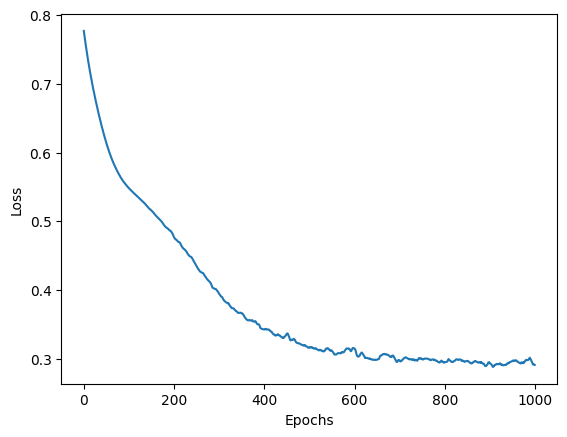

Training Losses are 
          0
0  0.602341
1  0.599870
2  0.597394
3  0.595047
4  0.592829
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2863  181]
 [ 368  588]]
Accuracy: 0.8628, Precision: 0.7646, Recall: 0.6151, F1-score: 0.6817

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2862  182]
 [ 346  610]]
Accuracy: 0.8680, Precision: 0.7702, Recall: 0.6381, F1-score: 0.6979



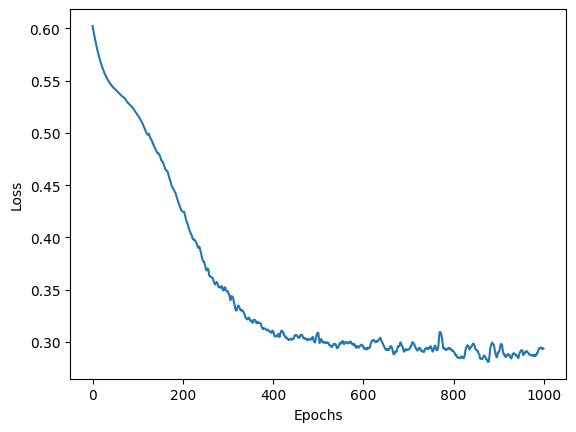

Training Losses are 
          0
0  0.707239
1  0.700712
2  0.694289
3  0.688041
4  0.681967
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2779  265]
 [ 267  689]]
Accuracy: 0.8670, Precision: 0.7222, Recall: 0.7207, F1-score: 0.7215

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2769  275]
 [ 265  691]]
Accuracy: 0.8650, Precision: 0.7153, Recall: 0.7228, F1-score: 0.7190



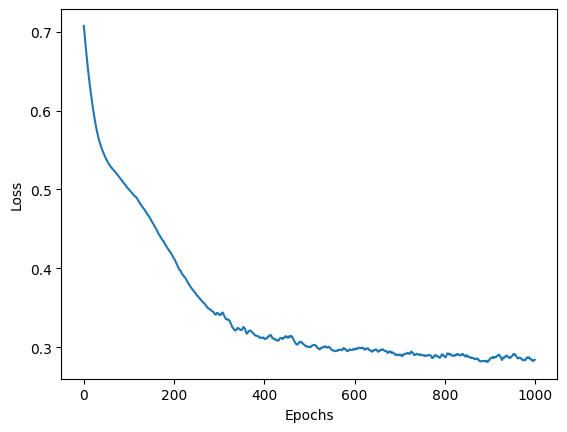

Training Losses are 
          0
0  0.637152
1  0.632217
2  0.627540
3  0.622968
4  0.618587
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2780  264]
 [ 254  702]]
Accuracy: 0.8705, Precision: 0.7267, Recall: 0.7343, F1-score: 0.7305

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2790  254]
 [ 266  690]]
Accuracy: 0.8700, Precision: 0.7309, Recall: 0.7218, F1-score: 0.7263



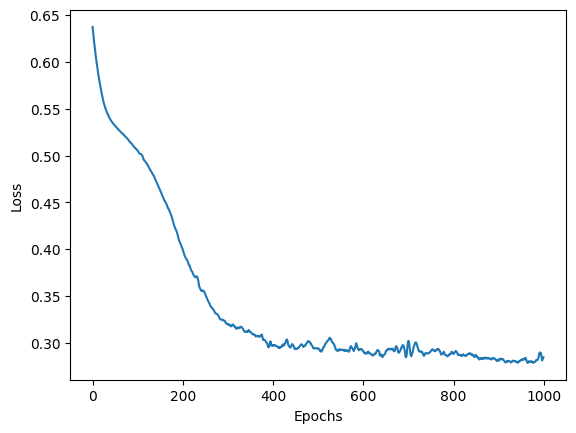

Training Losses are 
          0
0  0.783441
1  0.774700
2  0.766219
3  0.758042
4  0.749995
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2784  260]
 [ 262  694]]
Accuracy: 0.8695, Precision: 0.7275, Recall: 0.7259, F1-score: 0.7267

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2799  245]
 [ 249  707]]
Accuracy: 0.8765, Precision: 0.7426, Recall: 0.7395, F1-score: 0.7411



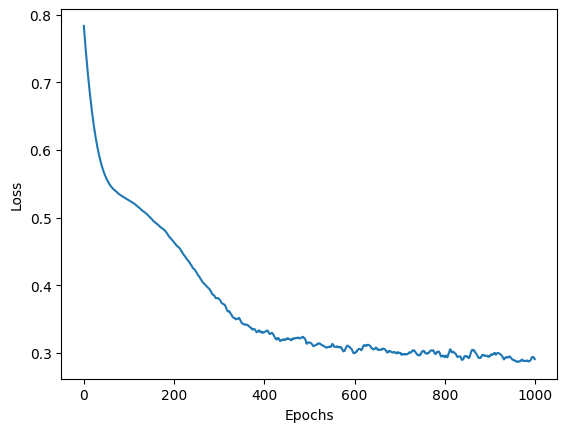

Training Losses are 
          0
0  0.652595
1  0.647603
2  0.642597
3  0.637691
4  0.632924
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2731  313]
 [ 236  720]]
Accuracy: 0.8628, Precision: 0.6970, Recall: 0.7531, F1-score: 0.7240

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2717  327]
 [ 220  736]]
Accuracy: 0.8632, Precision: 0.6924, Recall: 0.7699, F1-score: 0.7291



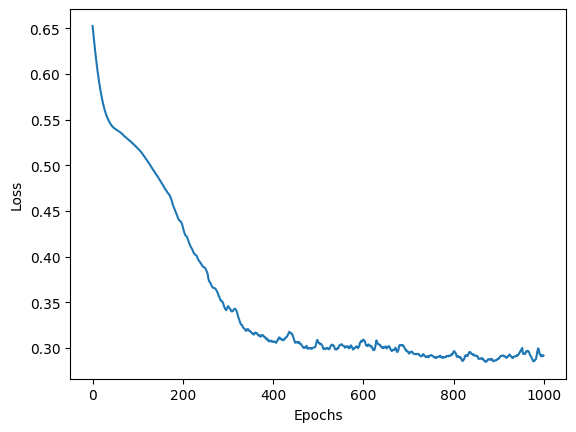

Training Losses are 
          0
0  0.765668
1  0.752925
2  0.740682
3  0.728869
4  0.717422
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2834  210]
 [ 327  629]]
Accuracy: 0.8658, Precision: 0.7497, Recall: 0.6579, F1-score: 0.7008

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2832  212]
 [ 331  625]]
Accuracy: 0.8642, Precision: 0.7467, Recall: 0.6538, F1-score: 0.6972



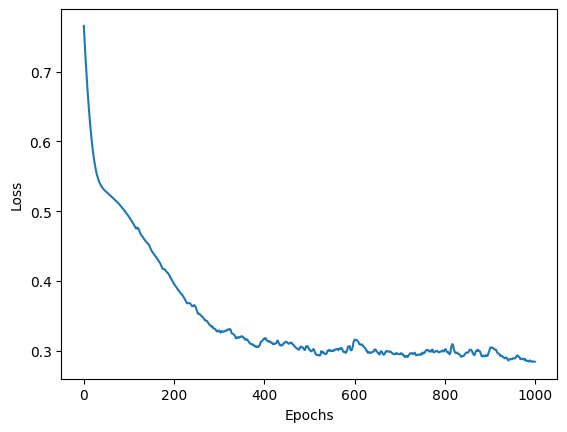

Training Losses are 
          0
0  0.731803
1  0.719995
2  0.708673
3  0.697715
4  0.687110
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2805  239]
 [ 310  646]]
Accuracy: 0.8628, Precision: 0.7299, Recall: 0.6757, F1-score: 0.7018

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2805  239]
 [ 289  667]]
Accuracy: 0.8680, Precision: 0.7362, Recall: 0.6977, F1-score: 0.7164



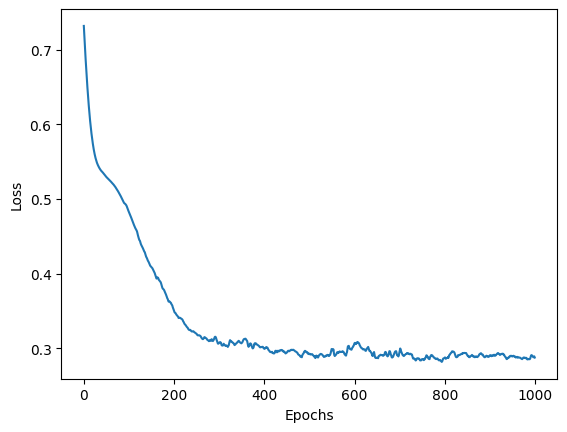

Training Losses are 
          0
0  0.607454
1  0.600766
2  0.594468
3  0.588635
4  0.583284
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2801  243]
 [ 281  675]]
Accuracy: 0.8690, Precision: 0.7353, Recall: 0.7061, F1-score: 0.7204

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2796  248]
 [ 291  665]]
Accuracy: 0.8652, Precision: 0.7284, Recall: 0.6956, F1-score: 0.7116



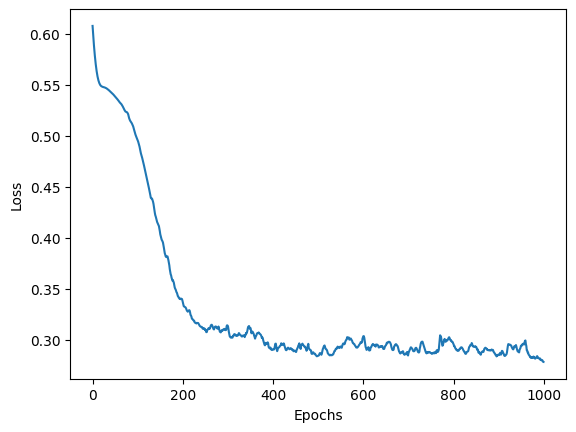

Training Losses are 
          0
0  0.698977
1  0.687848
2  0.677225
3  0.667065
4  0.657348
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2871  173]
 [ 376  580]]
Accuracy: 0.8628, Precision: 0.7703, Recall: 0.6067, F1-score: 0.6788

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2886  158]
 [ 362  594]]
Accuracy: 0.8700, Precision: 0.7899, Recall: 0.6213, F1-score: 0.6956



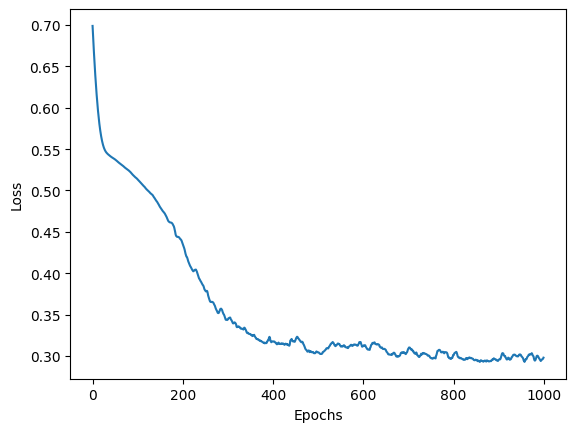

Training Losses are 
          0
0  0.599019
1  0.597241
2  0.595479
3  0.593767
4  0.592096
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2821  223]
 [ 295  661]]
Accuracy: 0.8705, Precision: 0.7477, Recall: 0.6914, F1-score: 0.7185

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2831  213]
 [ 289  667]]
Accuracy: 0.8745, Precision: 0.7580, Recall: 0.6977, F1-score: 0.7266



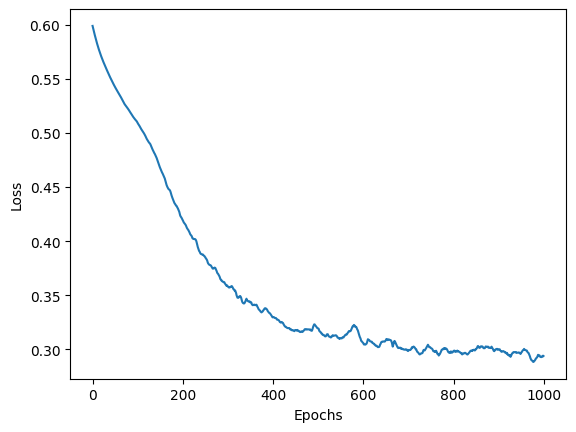

Training Losses are 
          0
0  0.697563
1  0.693704
2  0.689892
3  0.686163
4  0.682491
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2748  296]
 [ 247  709]]
Accuracy: 0.8642, Precision: 0.7055, Recall: 0.7416, F1-score: 0.7231

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2756  288]
 [ 237  719]]
Accuracy: 0.8688, Precision: 0.7140, Recall: 0.7521, F1-score: 0.7326



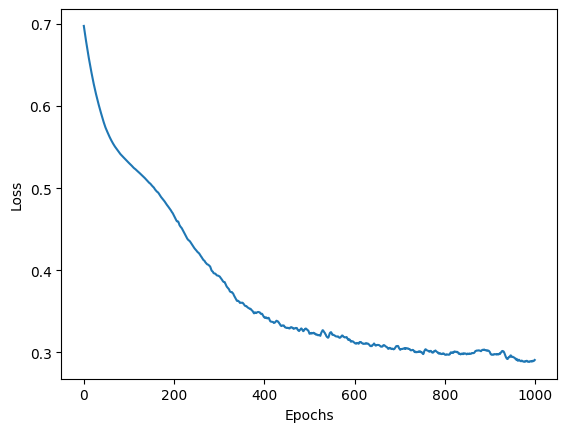

Training Losses are 
          0
0  0.701343
1  0.696731
2  0.692296
3  0.687939
4  0.683654
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2782  262]
 [ 303  653]]
Accuracy: 0.8588, Precision: 0.7137, Recall: 0.6831, F1-score: 0.6980

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2775  269]
 [ 302  654]]
Accuracy: 0.8572, Precision: 0.7086, Recall: 0.6841, F1-score: 0.6961



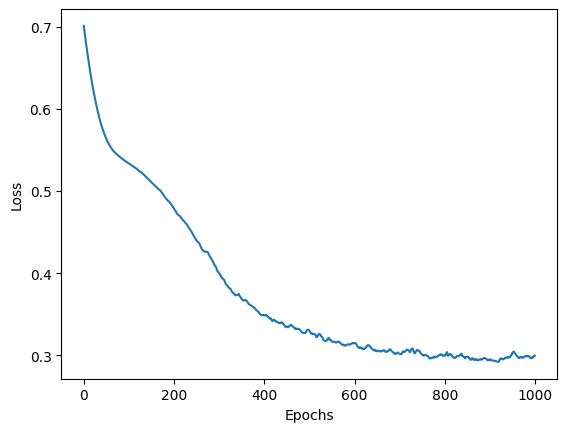

Training Losses are 
          0
0  0.561668
1  0.560663
2  0.559586
3  0.558539
4  0.557559
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2810  234]
 [ 291  665]]
Accuracy: 0.8688, Precision: 0.7397, Recall: 0.6956, F1-score: 0.7170

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2809  235]
 [ 280  676]]
Accuracy: 0.8712, Precision: 0.7420, Recall: 0.7071, F1-score: 0.7242



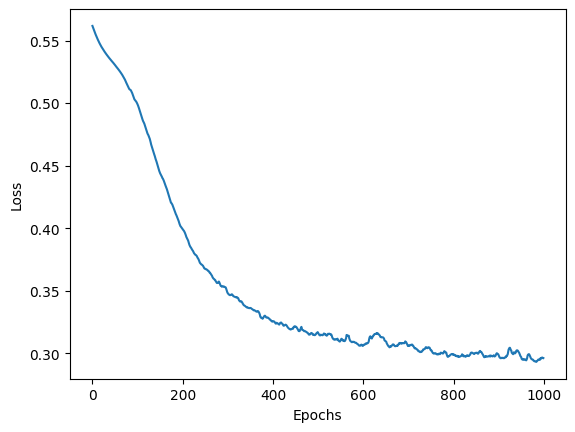

Training Losses are 
          0
0  0.745211
1  0.739564
2  0.734073
3  0.728639
4  0.723355
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2885  159]
 [ 380  576]]
Accuracy: 0.8652, Precision: 0.7837, Recall: 0.6025, F1-score: 0.6813

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2873  171]
 [ 388  568]]
Accuracy: 0.8602, Precision: 0.7686, Recall: 0.5941, F1-score: 0.6702



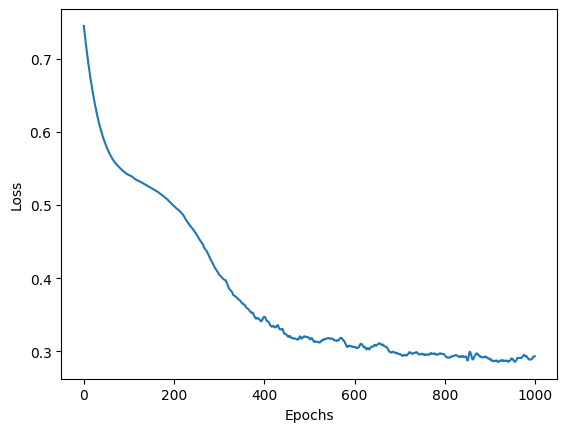

Training Losses are 
          0
0  0.569877
1  0.568332
2  0.566780
3  0.565385
4  0.564000
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2806  238]
 [ 301  655]]
Accuracy: 0.8652, Precision: 0.7335, Recall: 0.6851, F1-score: 0.7085

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2823  221]
 [ 285  671]]
Accuracy: 0.8735, Precision: 0.7522, Recall: 0.7019, F1-score: 0.7262



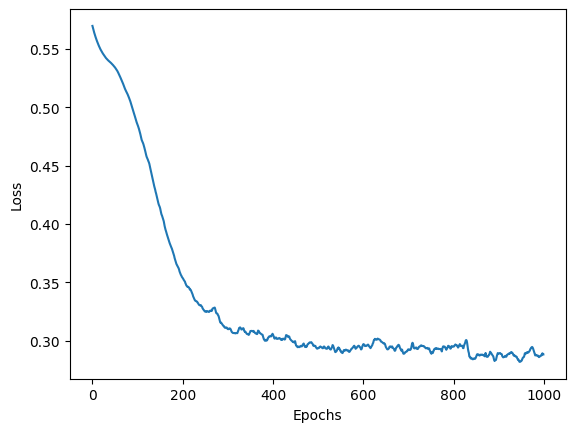

Training Losses are 
          0
0  0.717373
1  0.711788
2  0.706382
3  0.701114
4  0.696023
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2812  232]
 [ 292  664]]
Accuracy: 0.8690, Precision: 0.7411, Recall: 0.6946, F1-score: 0.7171

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2818  226]
 [ 319  637]]
Accuracy: 0.8638, Precision: 0.7381, Recall: 0.6663, F1-score: 0.7004



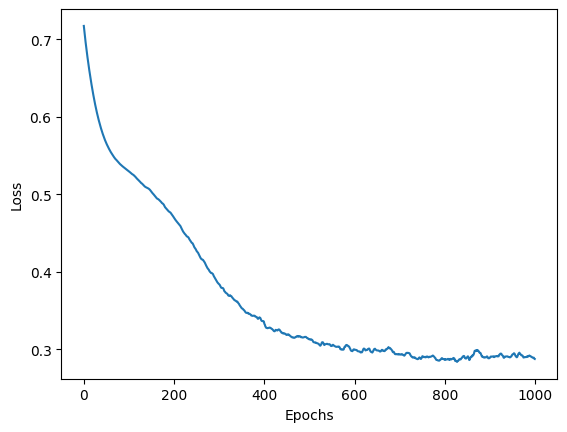

Training Losses are 
          0
0  0.770629
1  0.764571
2  0.758539
3  0.752646
4  0.746811
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2844  200]
 [ 321  635]]
Accuracy: 0.8698, Precision: 0.7605, Recall: 0.6642, F1-score: 0.7091

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2861  183]
 [ 325  631]]
Accuracy: 0.8730, Precision: 0.7752, Recall: 0.6600, F1-score: 0.7130



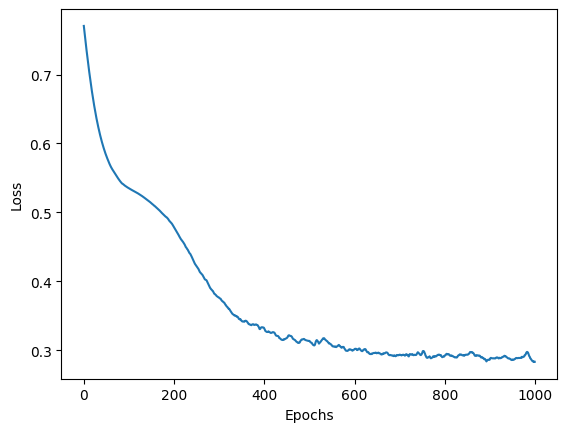

Training Losses are 
          0
0  0.898127
1  0.885793
2  0.873866
3  0.862244
4  0.850917
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2841  203]
 [ 330  626]]
Accuracy: 0.8668, Precision: 0.7551, Recall: 0.6548, F1-score: 0.7014

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2857  187]
 [ 317  639]]
Accuracy: 0.8740, Precision: 0.7736, Recall: 0.6684, F1-score: 0.7172



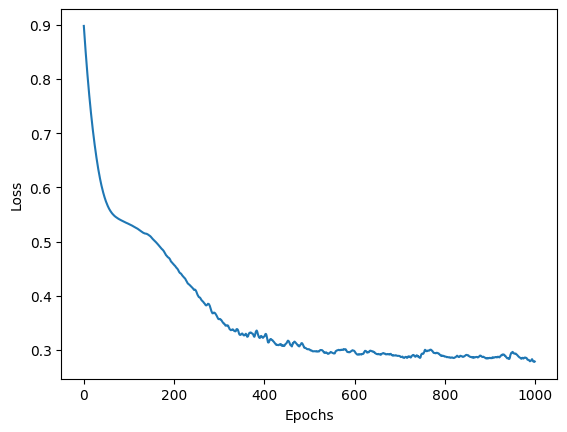

Training Losses are 
          0
0  0.735703
1  0.727201
2  0.718941
3  0.710945
4  0.703206
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2782  262]
 [ 304  652]]
Accuracy: 0.8585, Precision: 0.7133, Recall: 0.6820, F1-score: 0.6973

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2784  260]
 [ 297  659]]
Accuracy: 0.8608, Precision: 0.7171, Recall: 0.6893, F1-score: 0.7029



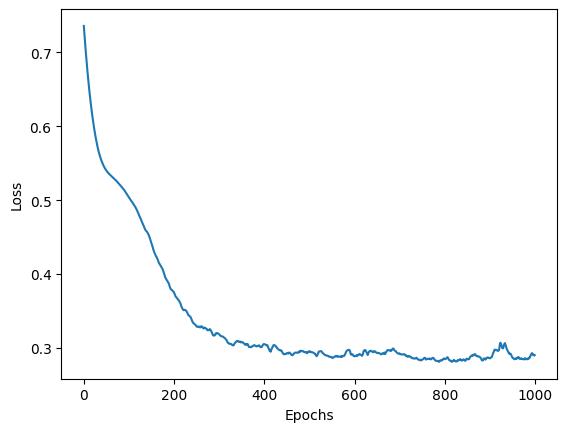

Training Losses are 
          0
0  0.609510
1  0.604436
2  0.599750
3  0.595327
4  0.591124
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2788  256]
 [ 271  685]]
Accuracy: 0.8682, Precision: 0.7279, Recall: 0.7165, F1-score: 0.7222

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2798  246]
 [ 252  704]]
Accuracy: 0.8755, Precision: 0.7411, Recall: 0.7364, F1-score: 0.7387



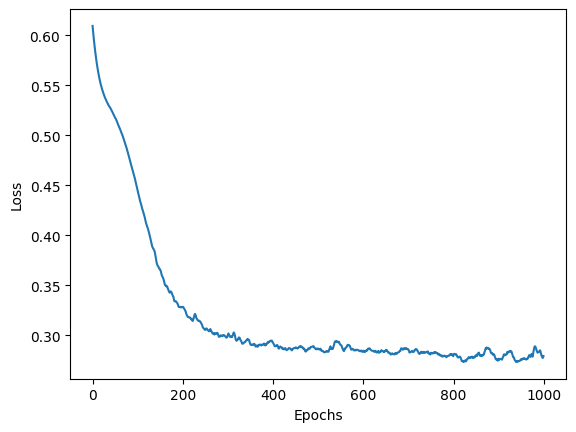

Training Losses are 
          0
0  0.632452
1  0.626725
2  0.621312
3  0.616051
4  0.610996
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2851  193]
 [ 337  619]]
Accuracy: 0.8675, Precision: 0.7623, Recall: 0.6475, F1-score: 0.7002

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2845  199]
 [ 323  633]]
Accuracy: 0.8695, Precision: 0.7608, Recall: 0.6621, F1-score: 0.7081



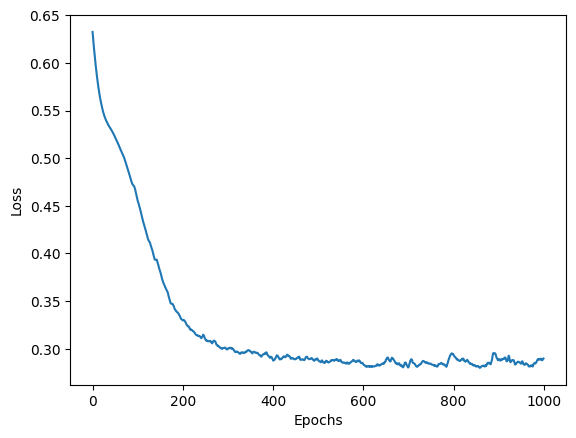

Training Losses are 
          0
0  0.781684
1  0.764239
2  0.747411
3  0.731466
4  0.716165
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2829  215]
 [ 336  620]]
Accuracy: 0.8622, Precision: 0.7425, Recall: 0.6485, F1-score: 0.6924

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2831  213]
 [ 323  633]]
Accuracy: 0.8660, Precision: 0.7482, Recall: 0.6621, F1-score: 0.7026



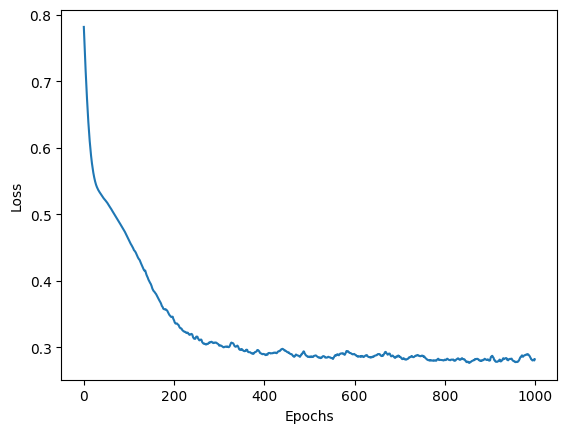

Training Losses are 
          0
0  0.616009
1  0.606815
2  0.598317
3  0.590594
4  0.583577
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2828  216]
 [ 303  653]]
Accuracy: 0.8702, Precision: 0.7514, Recall: 0.6831, F1-score: 0.7156

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2839  205]
 [ 307  649]]
Accuracy: 0.8720, Precision: 0.7600, Recall: 0.6789, F1-score: 0.7171



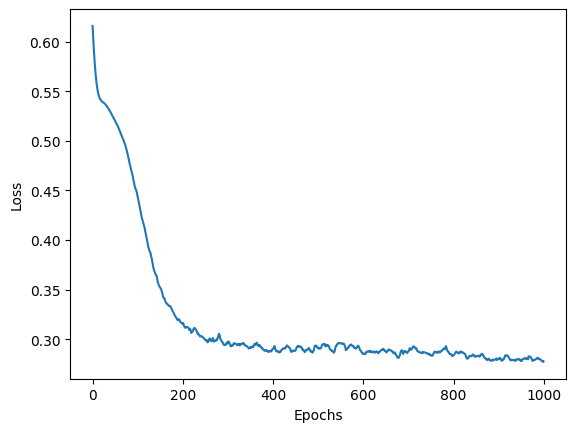

Training Losses are 
          0
0  0.689716
1  0.677221
2  0.665317
3  0.653969
4  0.643198
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2810  234]
 [ 295  661]]
Accuracy: 0.8678, Precision: 0.7385, Recall: 0.6914, F1-score: 0.7142

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2829  215]
 [ 312  644]]
Accuracy: 0.8682, Precision: 0.7497, Recall: 0.6736, F1-score: 0.7096



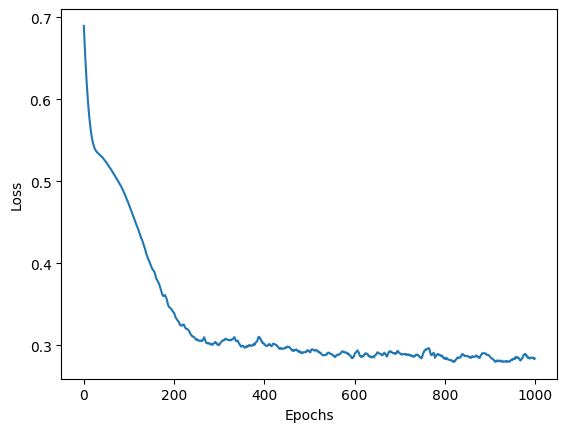

Training Losses are 
          0
0  0.730528
1  0.715497
2  0.701345
3  0.687922
4  0.675260
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2848  196]
 [ 314  642]]
Accuracy: 0.8725, Precision: 0.7661, Recall: 0.6715, F1-score: 0.7157

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2856  188]
 [ 333  623]]
Accuracy: 0.8698, Precision: 0.7682, Recall: 0.6517, F1-score: 0.7051



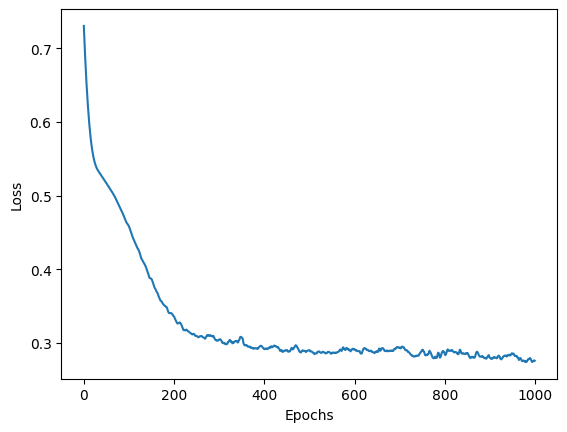

Training Losses are 
          0
0  0.839050
1  0.831681
2  0.824581
3  0.817636
4  0.810893
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2744  300]
 [ 238  718]]
Accuracy: 0.8655, Precision: 0.7053, Recall: 0.7510, F1-score: 0.7275

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2741  303]
 [ 250  706]]
Accuracy: 0.8618, Precision: 0.6997, Recall: 0.7385, F1-score: 0.7186



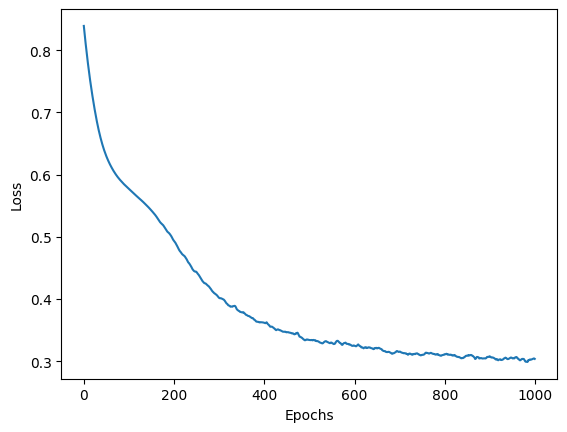

Training Losses are 
          0
0  0.716759
1  0.711132
2  0.705600
3  0.700230
4  0.695015
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2769  275]
 [ 242  714]]
Accuracy: 0.8708, Precision: 0.7219, Recall: 0.7469, F1-score: 0.7342

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2783  261]
 [ 241  715]]
Accuracy: 0.8745, Precision: 0.7326, Recall: 0.7479, F1-score: 0.7402



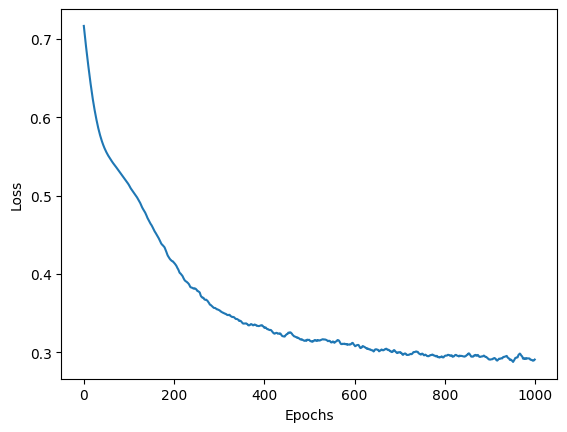

Training Losses are 
          0
0  0.805898
1  0.798780
2  0.791728
3  0.784912
4  0.778279
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2822  222]
 [ 289  667]]
Accuracy: 0.8722, Precision: 0.7503, Recall: 0.6977, F1-score: 0.7230

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2809  235]
 [ 278  678]]
Accuracy: 0.8718, Precision: 0.7426, Recall: 0.7092, F1-score: 0.7255



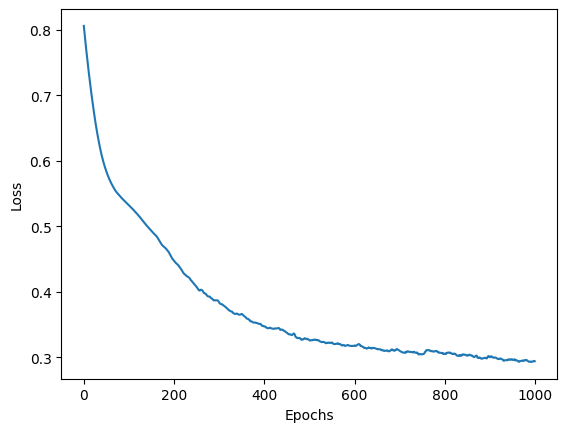

Training Losses are 
          0
0  0.799999
1  0.793822
2  0.787767
3  0.781759
4  0.775886
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2857  187]
 [ 336  620]]
Accuracy: 0.8692, Precision: 0.7683, Recall: 0.6485, F1-score: 0.7033

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2865  179]
 [ 338  618]]
Accuracy: 0.8708, Precision: 0.7754, Recall: 0.6464, F1-score: 0.7051



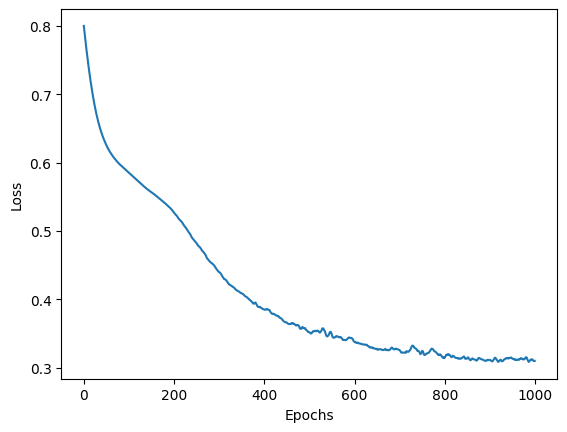

Training Losses are 
          0
0  0.571759
1  0.569221
2  0.566843
3  0.564563
4  0.562423
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2858  186]
 [ 328  628]]
Accuracy: 0.8715, Precision: 0.7715, Recall: 0.6569, F1-score: 0.7096

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2852  192]
 [ 324  632]]
Accuracy: 0.8710, Precision: 0.7670, Recall: 0.6611, F1-score: 0.7101



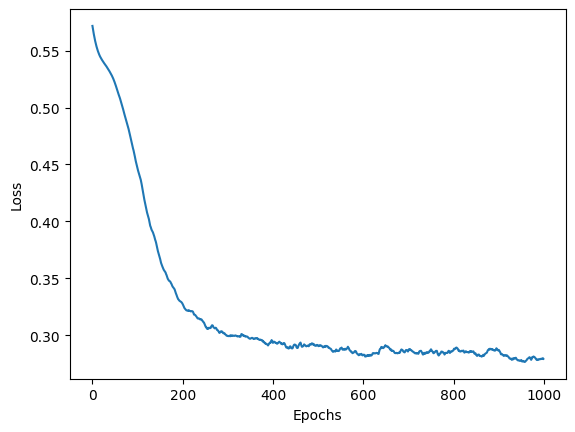

Training Losses are 
          0
0  0.754322
1  0.747207
2  0.740387
3  0.733710
4  0.727194
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2818  226]
 [ 298  658]]
Accuracy: 0.8690, Precision: 0.7443, Recall: 0.6883, F1-score: 0.7152

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2816  228]
 [ 283  673]]
Accuracy: 0.8722, Precision: 0.7469, Recall: 0.7040, F1-score: 0.7248



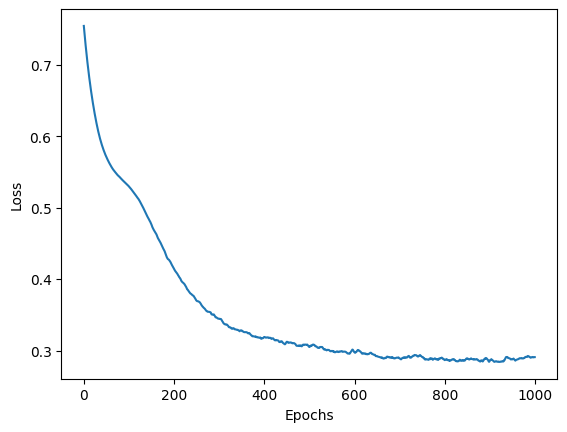

Training Losses are 
          0
0  0.668386
1  0.661346
2  0.654753
3  0.648333
4  0.642096
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2822  222]
 [ 303  653]]
Accuracy: 0.8688, Precision: 0.7463, Recall: 0.6831, F1-score: 0.7133

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2828  216]
 [ 304  652]]
Accuracy: 0.8700, Precision: 0.7512, Recall: 0.6820, F1-score: 0.7149



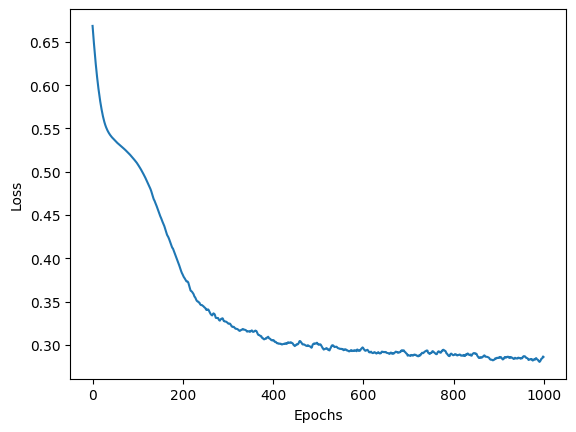

Training Losses are 
          0
0  0.618313
1  0.613046
2  0.607951
3  0.603048
4  0.598362
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2828  216]
 [ 302  654]]
Accuracy: 0.8705, Precision: 0.7517, Recall: 0.6841, F1-score: 0.7163

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2838  206]
 [ 285  671]]
Accuracy: 0.8772, Precision: 0.7651, Recall: 0.7019, F1-score: 0.7321



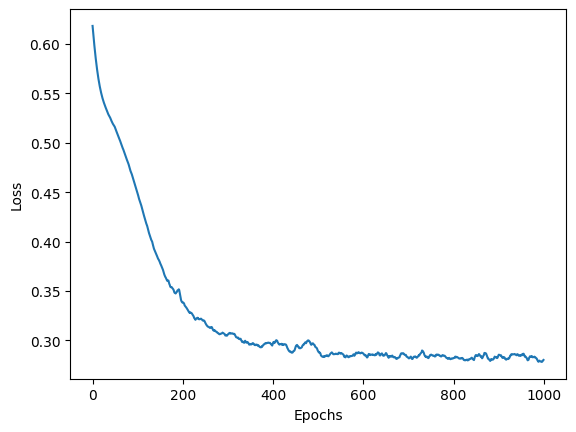

Training Losses are 
          0
0  0.675193
1  0.664313
2  0.653962
3  0.644057
4  0.634681
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2786  258]
 [ 271  685]]
Accuracy: 0.8678, Precision: 0.7264, Recall: 0.7165, F1-score: 0.7214

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2771  273]
 [ 287  669]]
Accuracy: 0.8600, Precision: 0.7102, Recall: 0.6998, F1-score: 0.7050



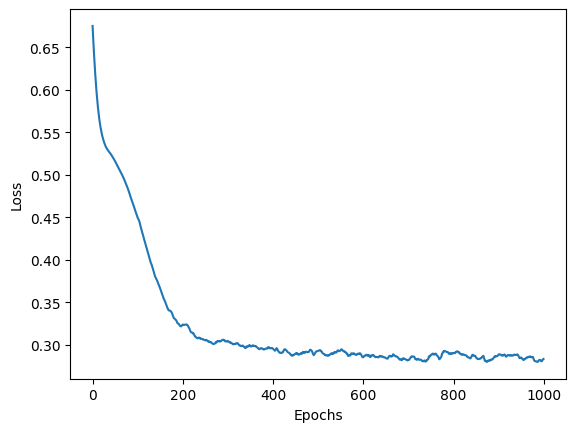

Training Losses are 
          0
0  0.607439
1  0.601131
2  0.595156
3  0.589512
4  0.584180
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2846  198]
 [ 324  632]]
Accuracy: 0.8695, Precision: 0.7614, Recall: 0.6611, F1-score: 0.7077

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2853  191]
 [ 330  626]]
Accuracy: 0.8698, Precision: 0.7662, Recall: 0.6548, F1-score: 0.7061



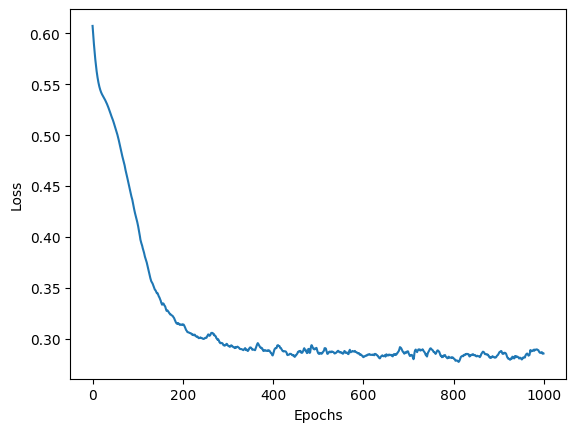

Training Losses are 
          0
0  0.707910
1  0.696817
2  0.686314
3  0.676282
4  0.666731
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2821  223]
 [ 313  643]]
Accuracy: 0.8660, Precision: 0.7425, Recall: 0.6726, F1-score: 0.7058

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2834  210]
 [ 313  643]]
Accuracy: 0.8692, Precision: 0.7538, Recall: 0.6726, F1-score: 0.7109



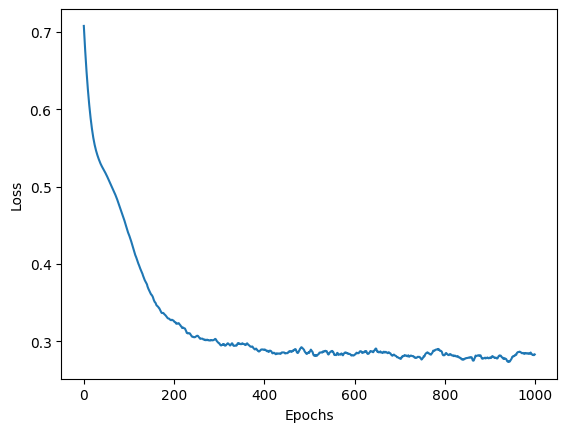

Training Losses are 
          0
0  0.766711
1  0.752859
2  0.739524
3  0.726679
4  0.714368
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2797  247]
 [ 269  687]]
Accuracy: 0.8710, Precision: 0.7355, Recall: 0.7186, F1-score: 0.7270

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2802  242]
 [ 270  686]]
Accuracy: 0.8720, Precision: 0.7392, Recall: 0.7176, F1-score: 0.7282



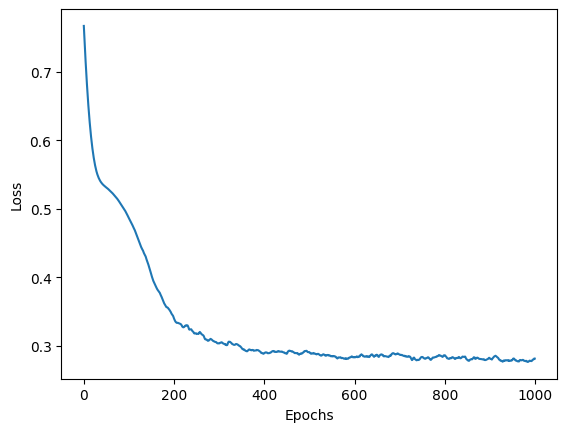

Training Losses are 
          0
0  0.699387
1  0.680749
2  0.663410
3  0.647570
4  0.633138
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2778  266]
 [ 287  669]]
Accuracy: 0.8618, Precision: 0.7155, Recall: 0.6998, F1-score: 0.7076

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2782  262]
 [ 263  693]]
Accuracy: 0.8688, Precision: 0.7257, Recall: 0.7249, F1-score: 0.7253



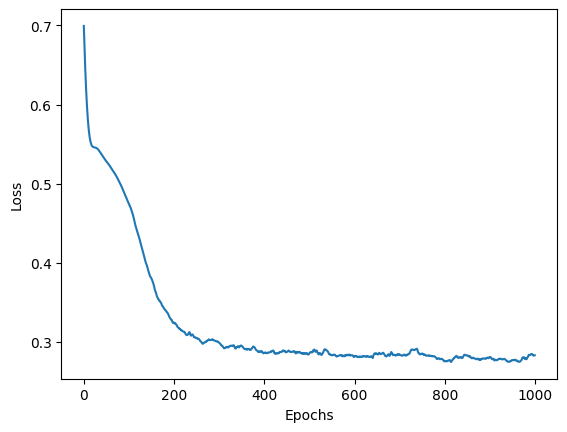

Training Losses are 
          0
0  0.637628
1  0.624979
2  0.613432
3  0.602940
4  0.593481
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2791  253]
 [ 264  692]]
Accuracy: 0.8708, Precision: 0.7323, Recall: 0.7238, F1-score: 0.7280

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2793  251]
 [ 286  670]]
Accuracy: 0.8658, Precision: 0.7275, Recall: 0.7008, F1-score: 0.7139



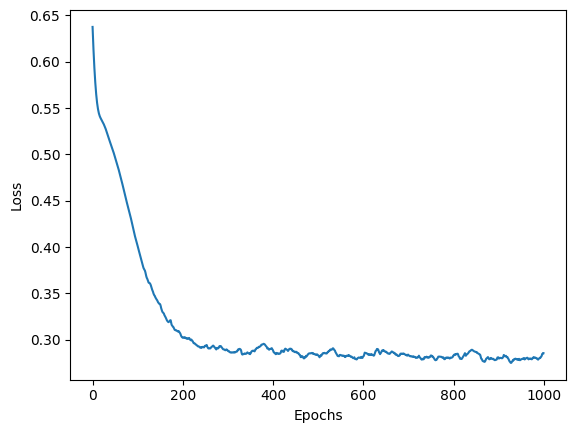

Training Losses are 
          0
0  0.632946
1  0.620177
2  0.608569
3  0.598088
4  0.588598
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2835  209]
 [ 321  635]]
Accuracy: 0.8675, Precision: 0.7524, Recall: 0.6642, F1-score: 0.7056

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2834  210]
 [ 331  625]]
Accuracy: 0.8648, Precision: 0.7485, Recall: 0.6538, F1-score: 0.6979



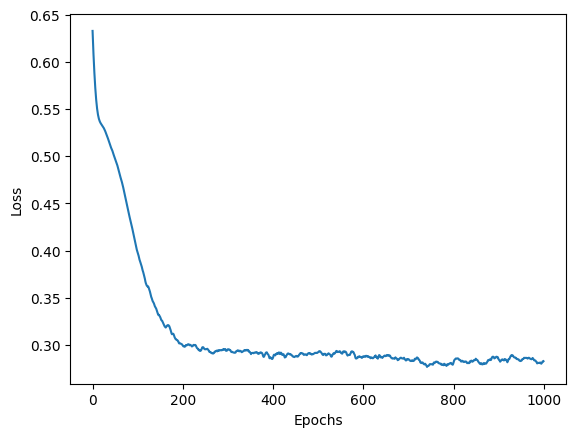

Training Losses are 
          0
0  0.756982
1  0.736813
2  0.717781
3  0.699895
4  0.682962
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2828  216]
 [ 321  635]]
Accuracy: 0.8658, Precision: 0.7462, Recall: 0.6642, F1-score: 0.7028

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2819  225]
 [ 328  628]]
Accuracy: 0.8618, Precision: 0.7362, Recall: 0.6569, F1-score: 0.6943



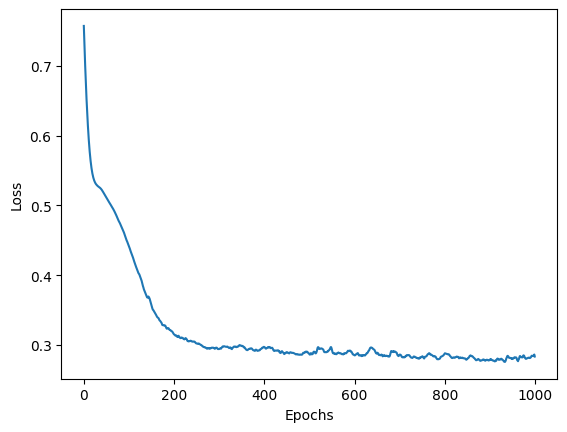

In [20]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(34,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()

Training Losses are 
          0
0  0.550614
1  0.550627
2  0.550604
3  0.550558
4  0.550531
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


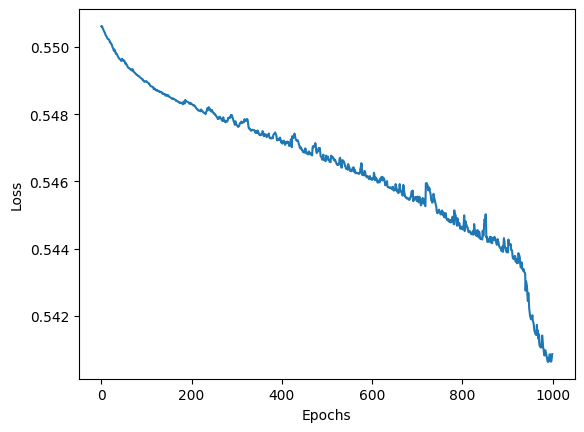

Training Losses are 
          0
0  0.736010
1  0.732831
2  0.729799
3  0.726725
4  0.723748
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


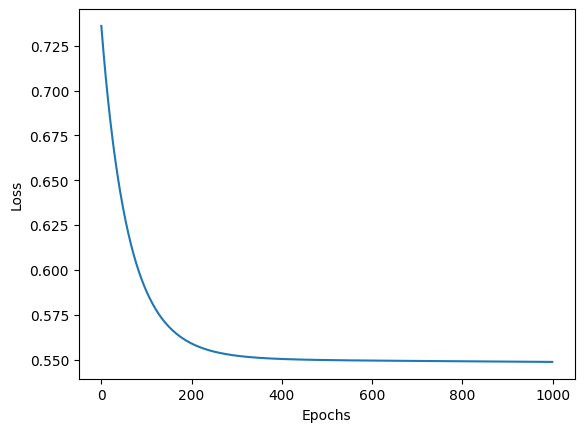

Training Losses are 
          0
0  0.970146
1  0.964010
2  0.957794
3  0.951865
4  0.946046
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


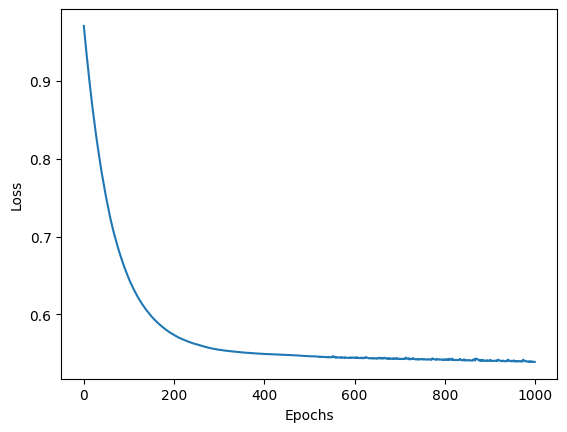

Training Losses are 
          0
0  0.672341
1  0.670340
2  0.668356
3  0.666420
4  0.664665
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


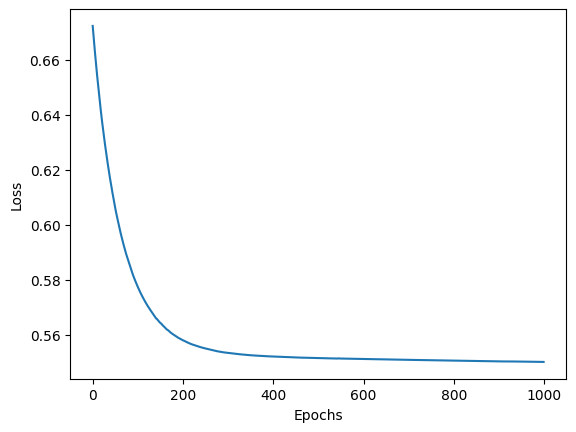

Training Losses are 
          0
0  0.705983
1  0.702042
2  0.698189
3  0.694333
4  0.690668
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


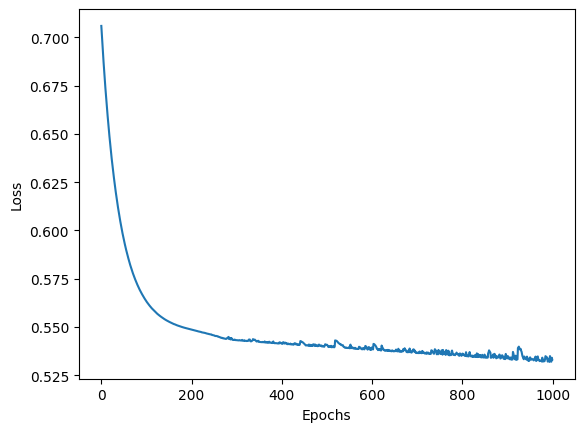

Training Losses are 
          0
0  0.631269
1  0.629320
2  0.627442
3  0.625623
4  0.623868
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


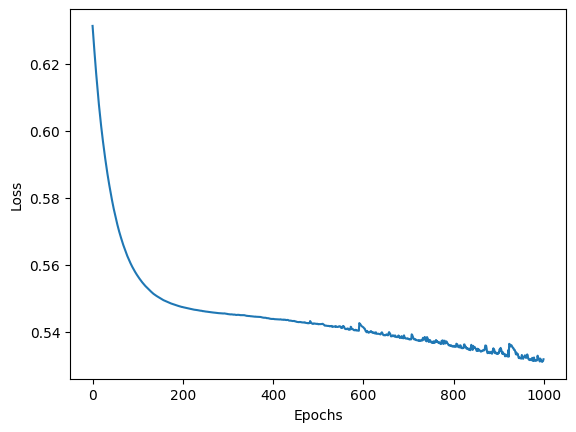

Training Losses are 
          0
0  0.847435
1  0.839564
2  0.831887
3  0.824424
4  0.817092
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


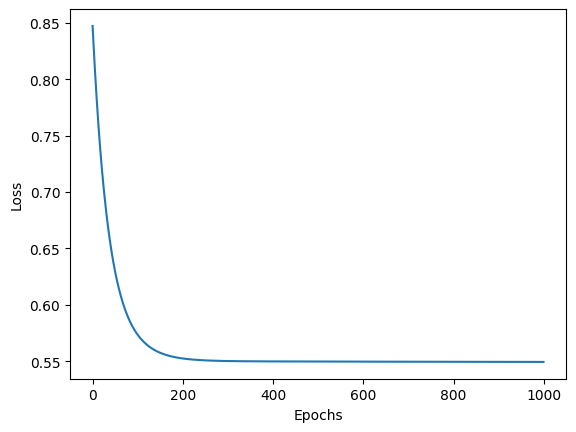

Training Losses are 
          0
0  0.773495
1  0.768353
2  0.763375
3  0.758505
4  0.753798
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


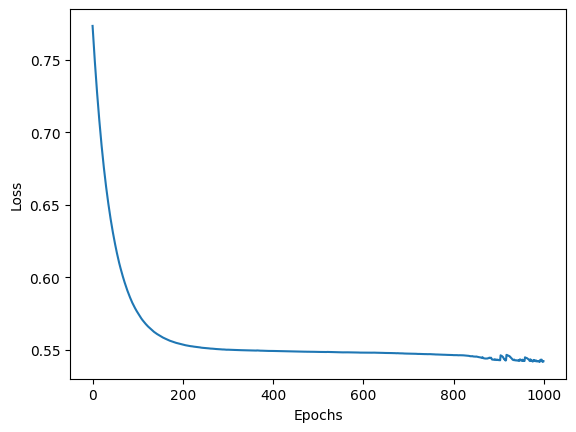

Training Losses are 
          0
0  0.746855
1  0.737166
2  0.727875
3  0.719034
4  0.710538
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


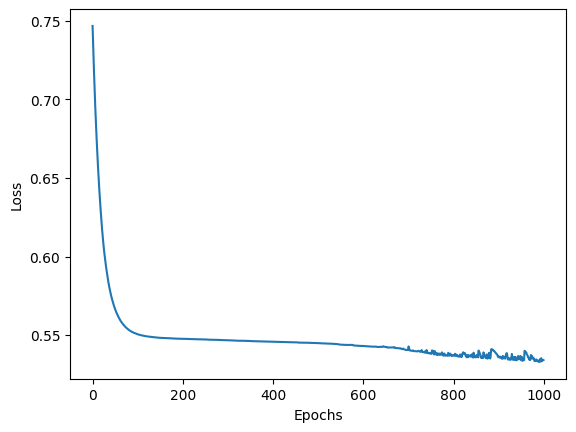

Training Losses are 
          0
0  0.876968
1  0.861682
2  0.847090
3  0.833102
4  0.819761
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


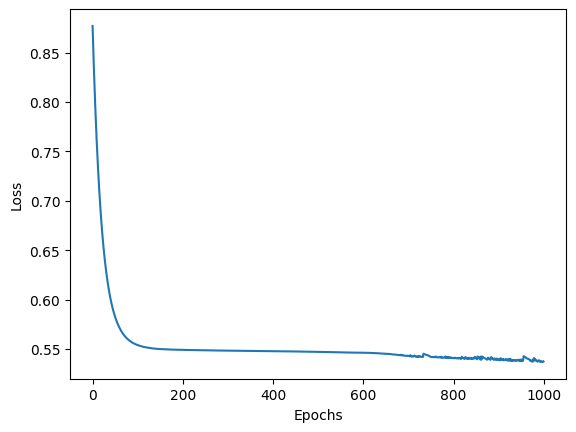

Training Losses are 
          0
0  0.659384
1  0.654070
2  0.649068
3  0.644350
4  0.639804
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


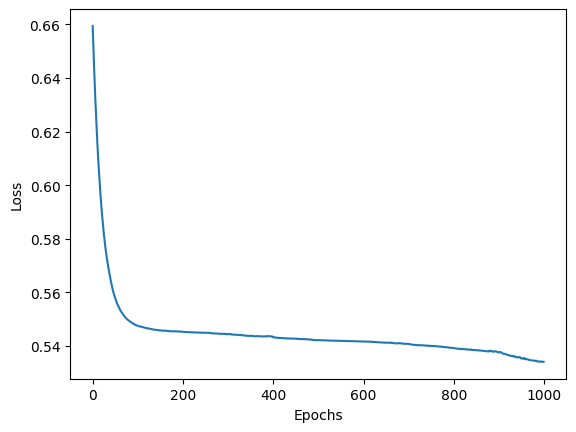

Training Losses are 
          0
0  0.638895
1  0.634274
2  0.629690
3  0.625950
4  0.622682
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


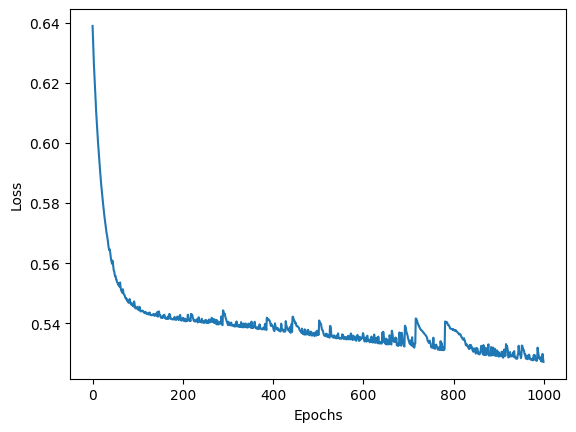

Training Losses are 
          0
0  0.698139
1  0.686000
2  0.674935
3  0.664846
4  0.655664
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


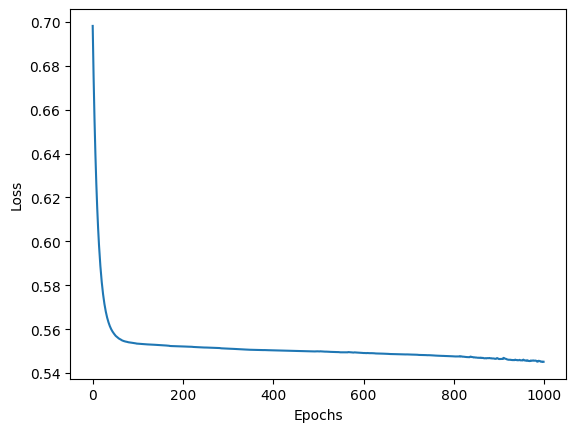

Training Losses are 
          0
0  0.645494
1  0.638179
2  0.631409
3  0.625273
4  0.619683
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


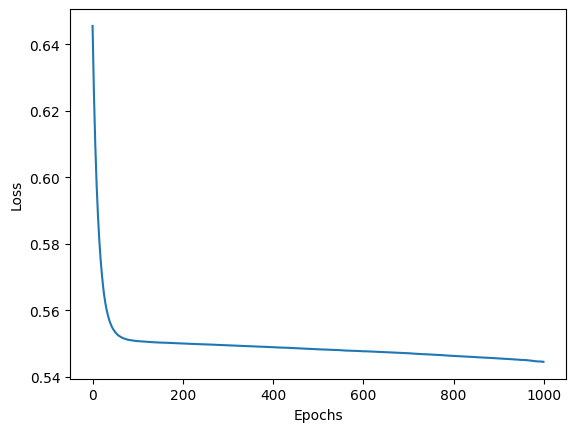

Training Losses are 
          0
0  0.846141
1  0.821087
2  0.798135
3  0.777120
4  0.757881
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


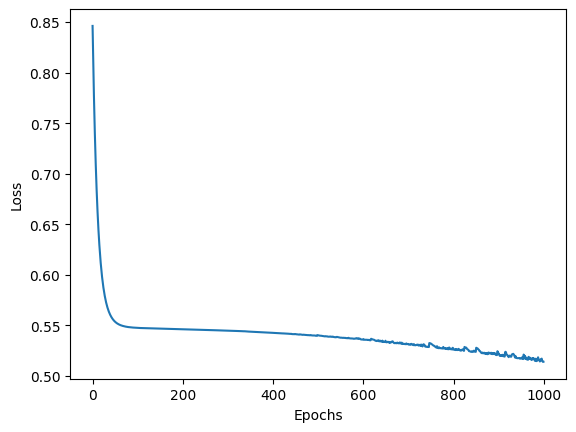

Training Losses are 
          0
0  0.645784
1  0.637892
2  0.630776
3  0.624561
4  0.618573
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


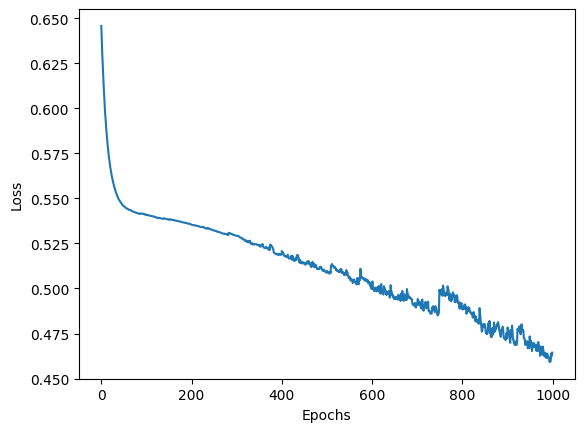

Training Losses are 
          0
0  0.699741
1  0.697412
2  0.695145
3  0.692835
4  0.690646
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


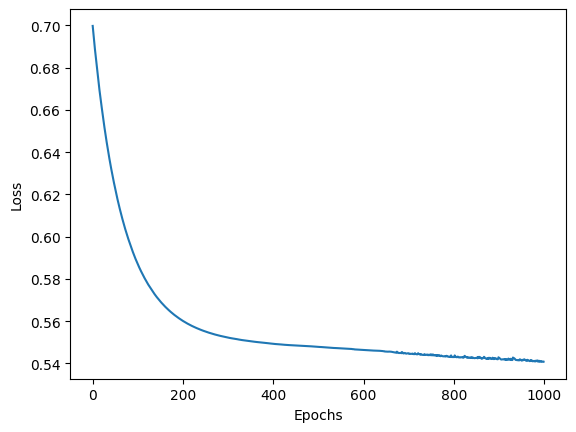

Training Losses are 
          0
0  0.891098
1  0.884945
2  0.879373
3  0.873574
4  0.868137
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


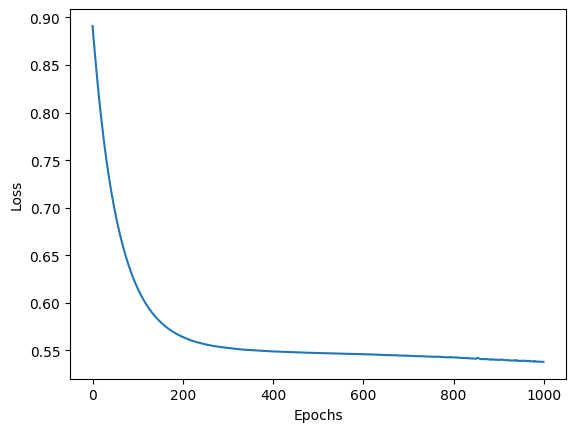

Training Losses are 
          0
0  0.659986
1  0.658408
2  0.656907
3  0.655295
4  0.653856
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


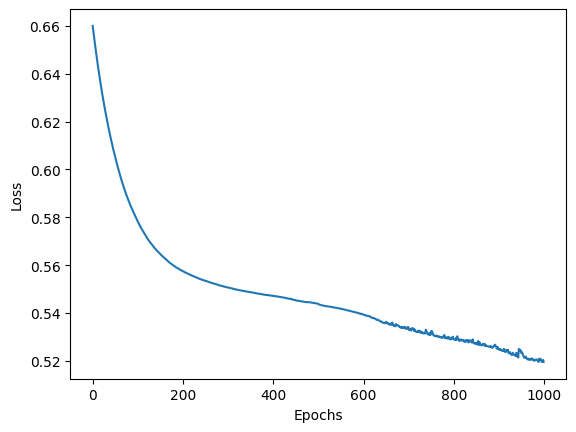

Training Losses are 
          0
0  0.664384
1  0.662476
2  0.660782
3  0.659055
4  0.657283
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


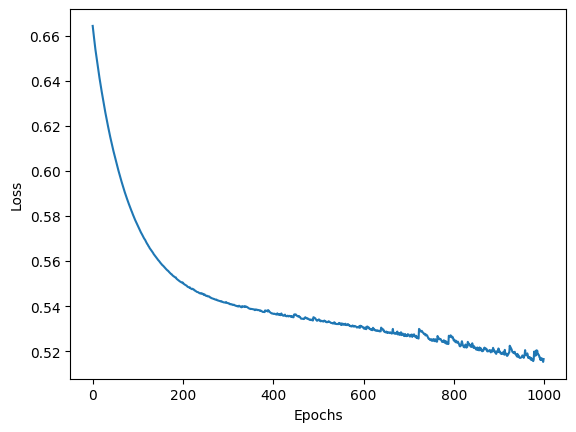

Training Losses are 
          0
0  0.738512
1  0.733498
2  0.728551
3  0.723800
4  0.719188
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


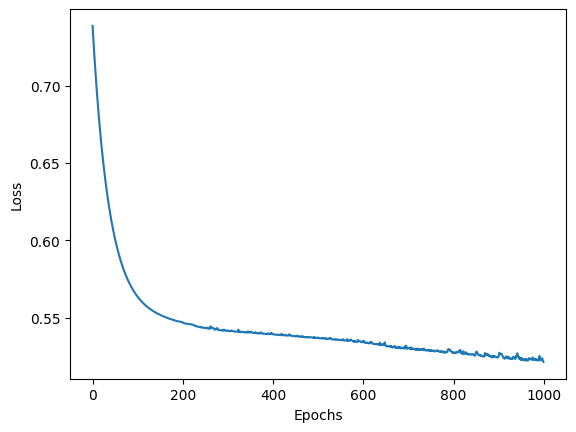

Training Losses are 
          0
0  0.694360
1  0.691025
2  0.687779
3  0.684604
4  0.681490
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


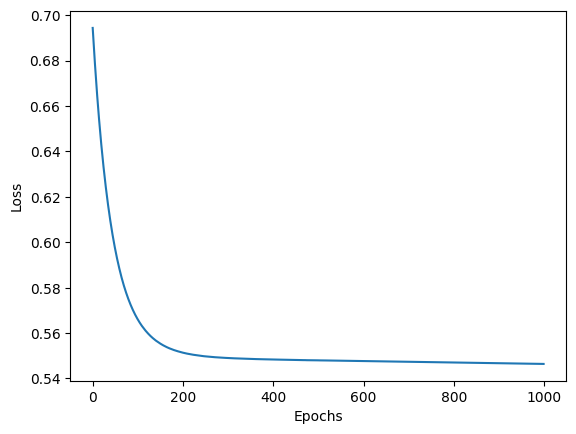

Training Losses are 
          0
0  0.629821
1  0.627749
2  0.625785
3  0.623891
4  0.622018
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


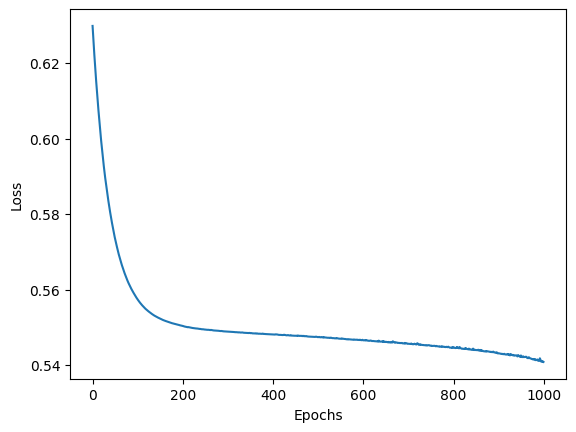

Training Losses are 
          0
0  0.617056
1  0.615111
2  0.612995
3  0.611135
4  0.609370
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


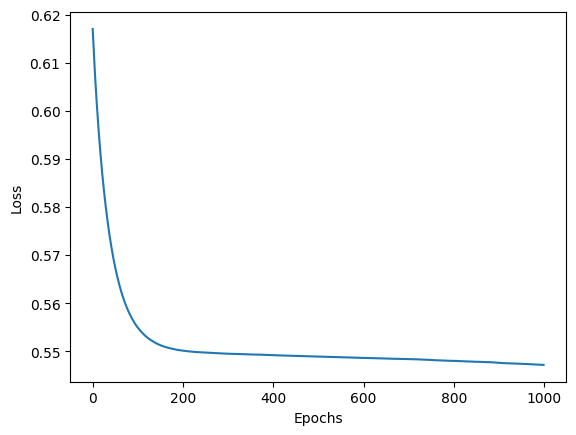

Training Losses are 
          0
0  0.681327
1  0.675524
2  0.669891
3  0.664671
4  0.659662
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


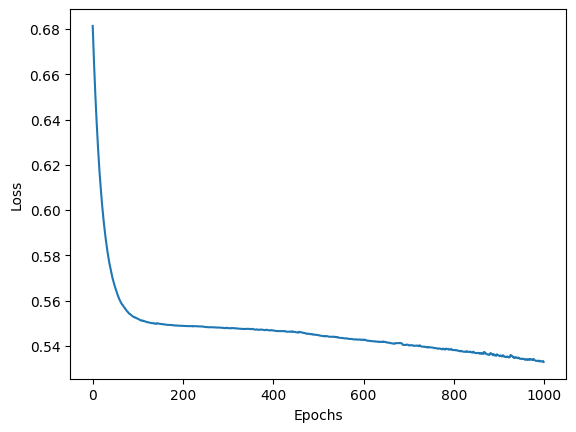

Training Losses are 
          0
0  0.634946
1  0.631478
2  0.628010
3  0.624758
4  0.621732
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


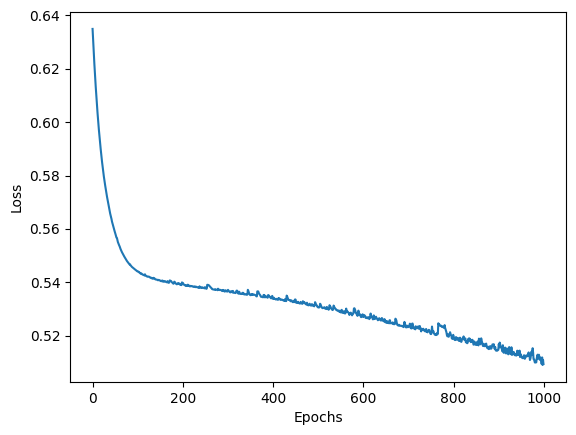

Training Losses are 
          0
0  0.835845
1  0.822704
2  0.810211
3  0.798356
4  0.786967
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


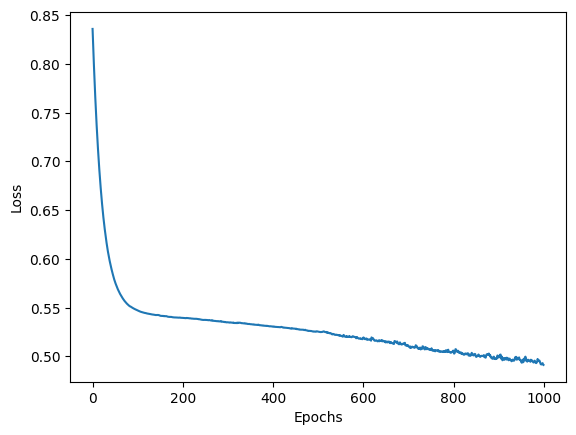

Training Losses are 
          0
0  0.714118
1  0.706358
2  0.699193
3  0.692042
4  0.685356
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


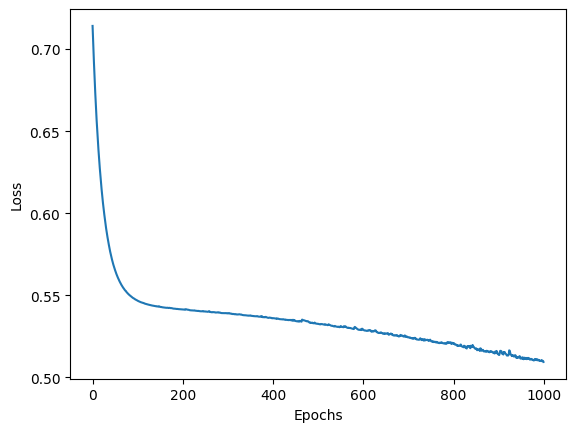

Training Losses are 
          0
0  0.871727
1  0.844296
2  0.819133
3  0.796095
4  0.775008
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


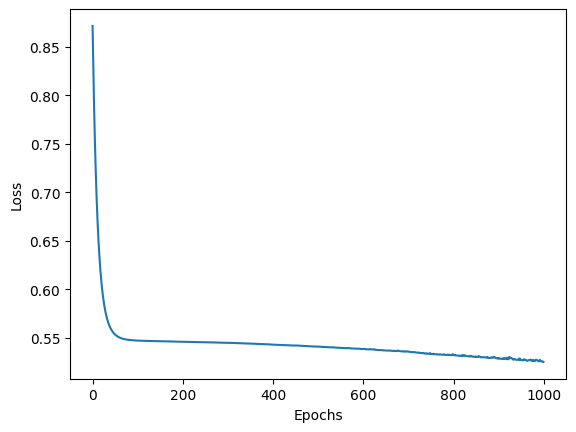

Training Losses are 
          0
0  0.771999
1  0.753662
2  0.736843
3  0.721410
4  0.707292
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


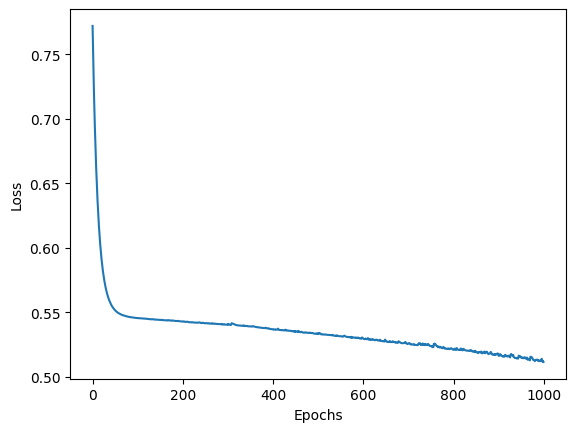

Training Losses are 
          0
0  0.597555
1  0.594000
2  0.590714
3  0.587761
4  0.584899
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


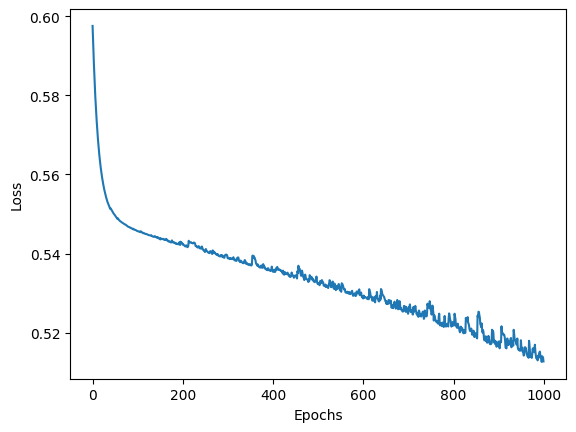

Training Losses are 
          0
0  0.775834
1  0.757667
2  0.740838
3  0.725400
4  0.711195
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


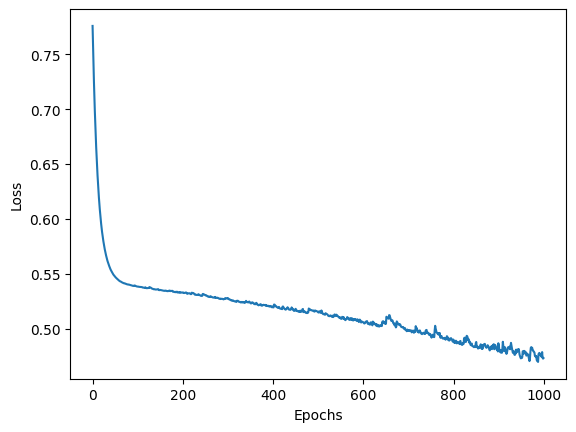

Training Losses are 
          0
0  0.595128
1  0.594411
2  0.593730
3  0.593039
4  0.592324
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


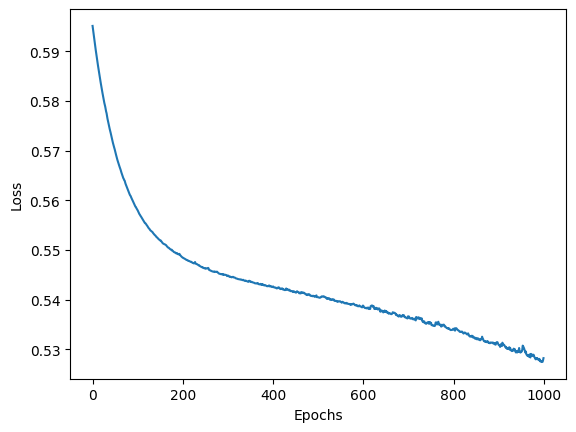

Training Losses are 
          0
0  0.614076
1  0.613124
2  0.612142
3  0.611214
4  0.610293
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


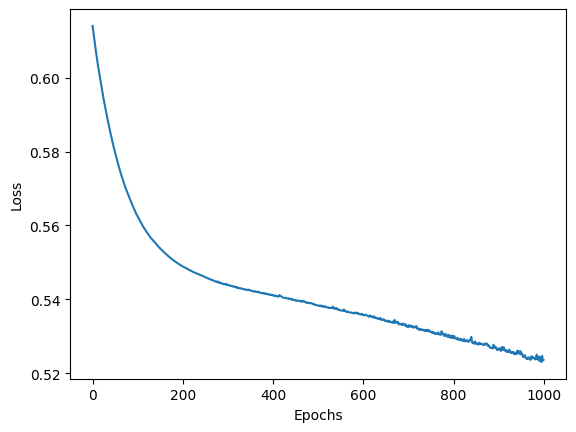

Training Losses are 
          0
0  1.006290
1  0.998905
2  0.991597
3  0.984528
4  0.977528
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


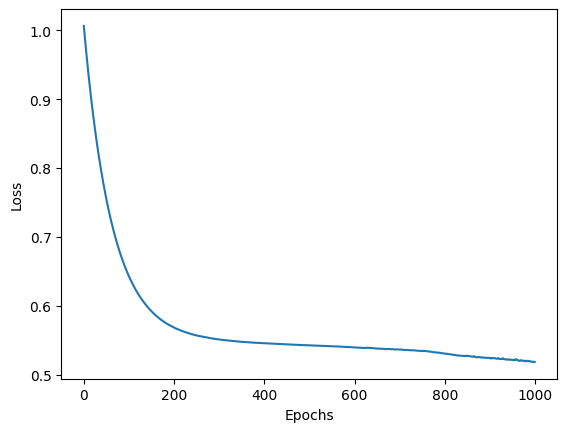

Training Losses are 
          0
0  0.692616
1  0.690314
2  0.688125
3  0.685973
4  0.683846
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


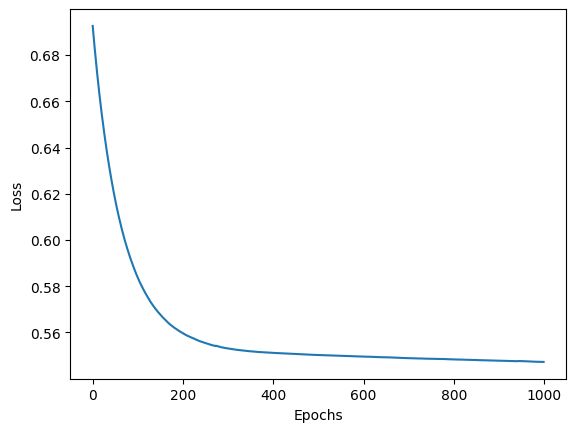

Training Losses are 
          0
0  0.876323
1  0.868019
2  0.859992
3  0.852029
4  0.844402
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


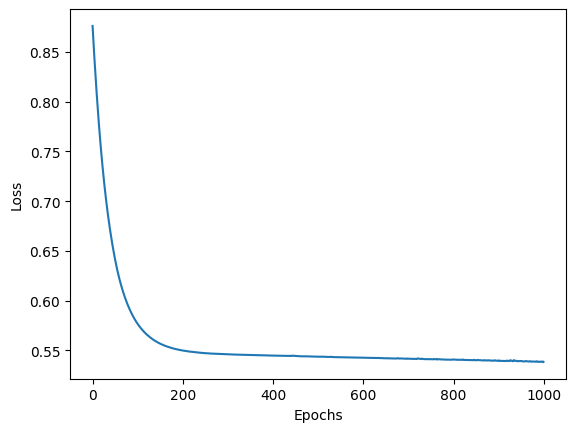

Training Losses are 
          0
0  0.749433
1  0.744680
2  0.740078
3  0.735584
4  0.731160
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


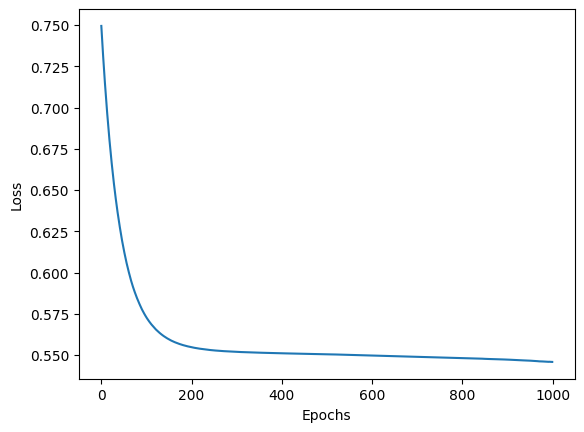

Training Losses are 
          0
0  0.662569
1  0.659851
2  0.657288
3  0.654709
4  0.652167
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


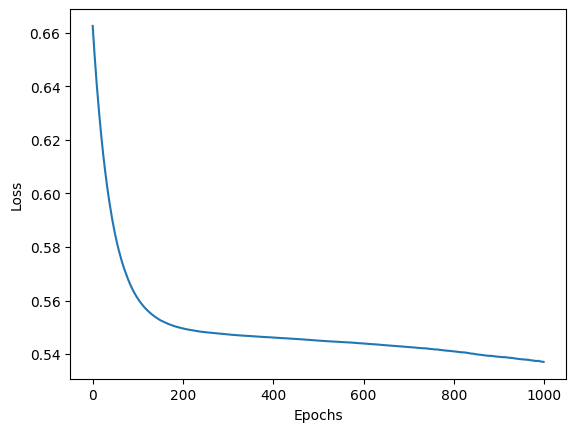

Training Losses are 
          0
0  0.772003
1  0.765837
2  0.759703
3  0.753966
4  0.748451
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


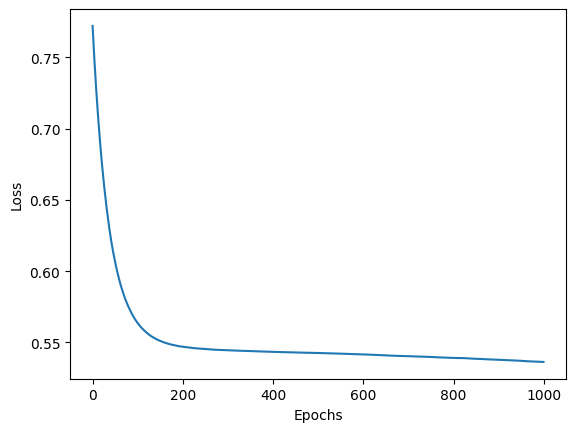

Training Losses are 
          0
0  0.761837
1  0.751814
2  0.742267
3  0.733180
4  0.724533
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


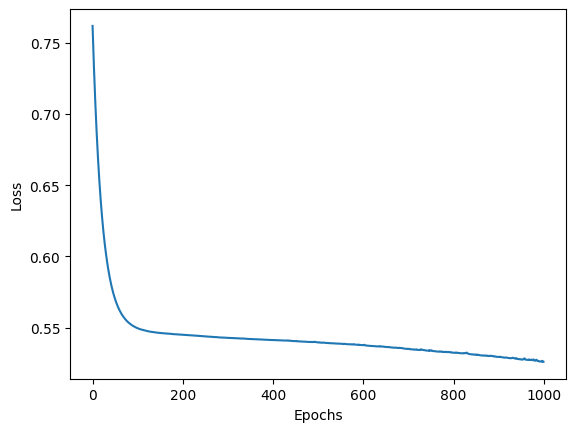

Training Losses are 
          0
0  0.653080
1  0.648194
2  0.643532
3  0.639085
4  0.634875
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


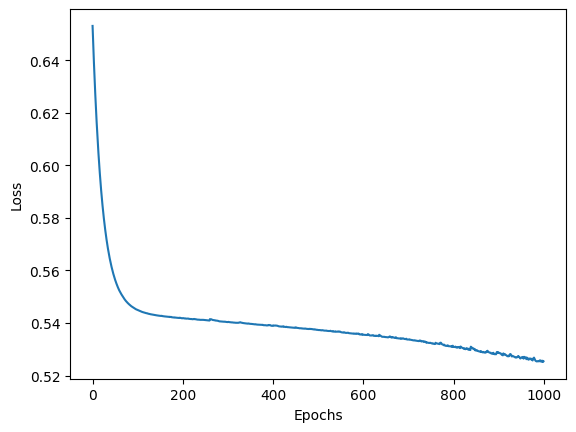

Training Losses are 
          0
0  0.697078
1  0.690126
2  0.683475
3  0.677181
4  0.671172
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


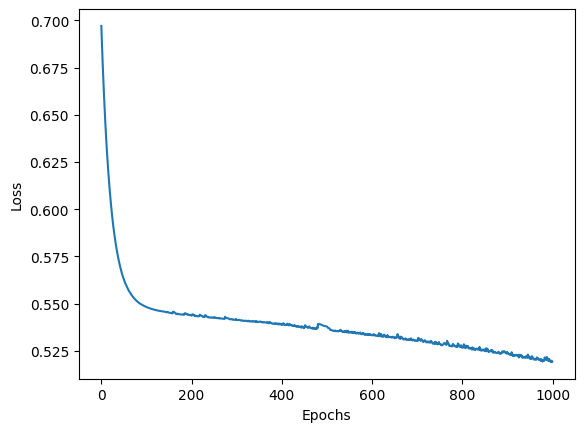

Training Losses are 
          0
0  0.708818
1  0.700442
2  0.693132
3  0.686398
4  0.679979
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


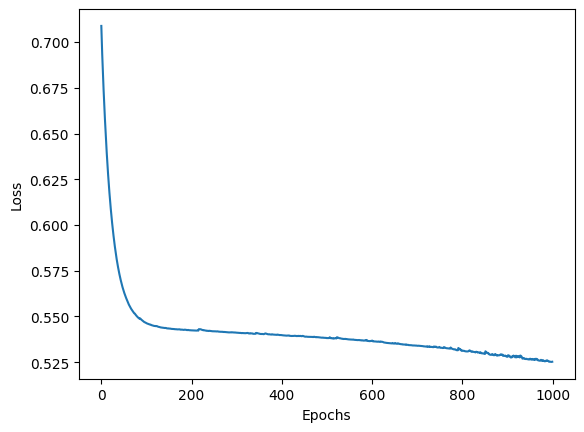

Training Losses are 
          0
0  0.707671
1  0.693998
2  0.681438
3  0.669983
4  0.659731
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


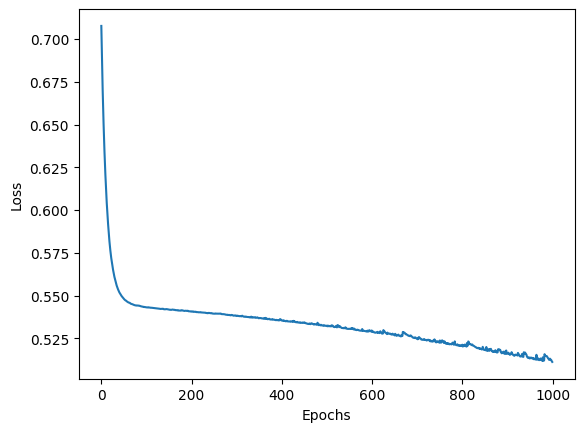

Training Losses are 
          0
0  0.856219
1  0.829611
2  0.805272
3  0.783004
4  0.762716
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


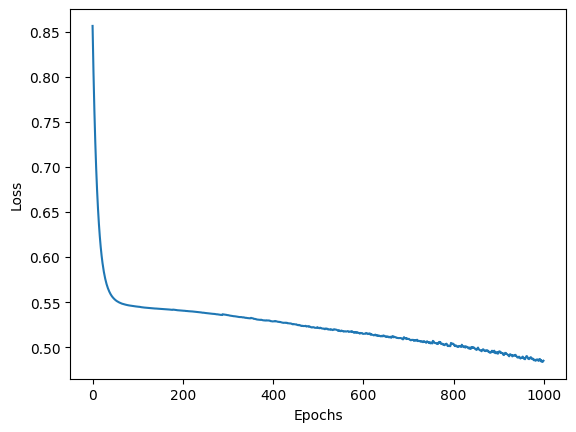

Training Losses are 
          0
0  0.681950
1  0.670668
2  0.660364
3  0.651161
4  0.642626
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


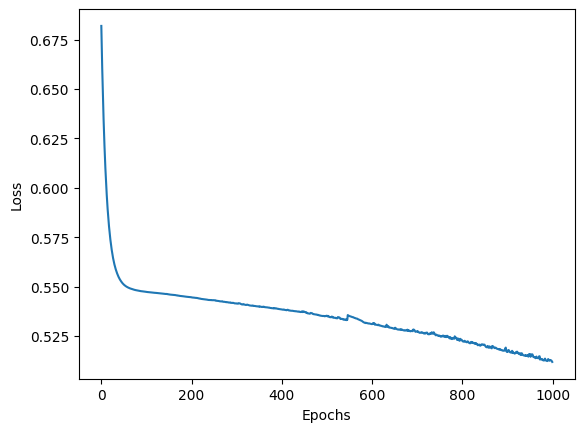

Training Losses are 
          0
0  0.771487
1  0.752753
2  0.735742
3  0.720117
4  0.705844
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


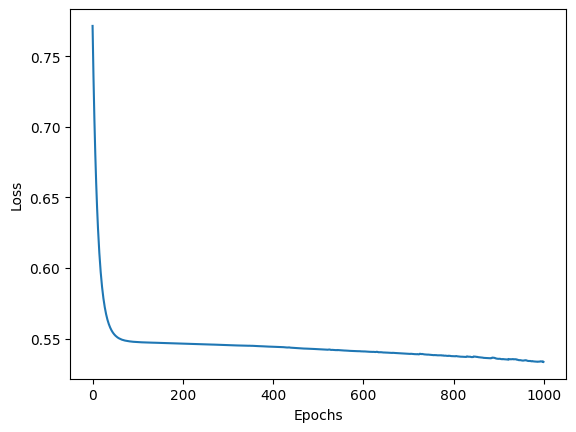

Training Losses are 
          0
0  0.792545
1  0.788400
2  0.784365
3  0.780483
4  0.776573
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


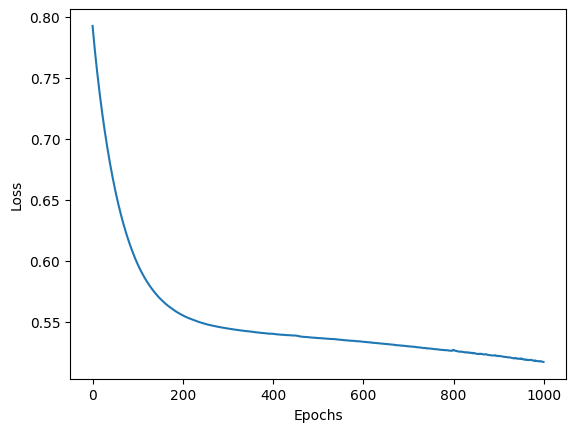

Training Losses are 
          0
0  0.685414
1  0.682757
2  0.680175
3  0.677643
4  0.675280
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


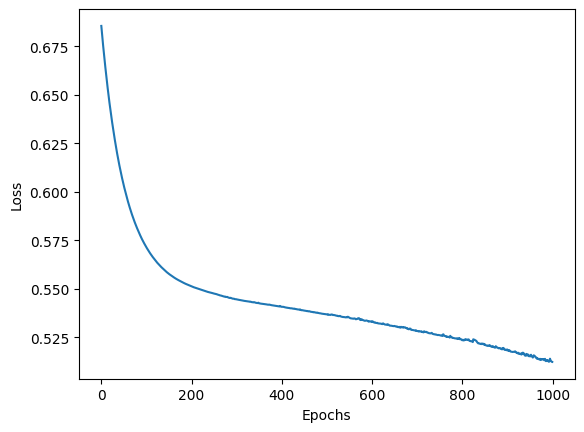

Training Losses are 
          0
0  0.735634
1  0.732345
2  0.729108
3  0.725992
4  0.722957
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


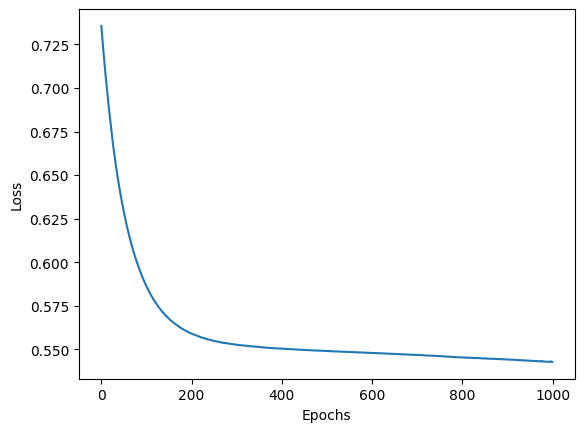

Training Losses are 
          0
0  0.610257
1  0.609185
2  0.608141
3  0.607094
4  0.606054
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


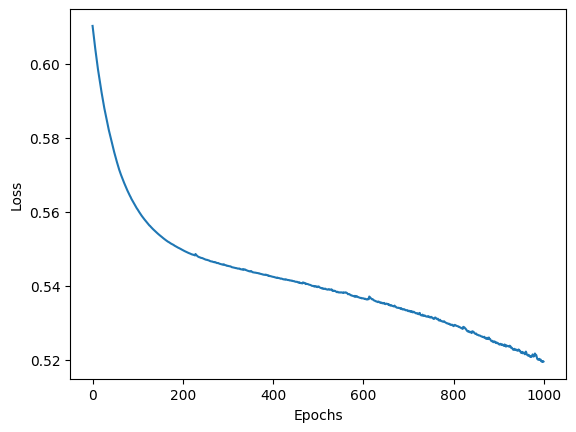

Training Losses are 
          0
0  0.791948
1  0.784896
2  0.778105
3  0.771516
4  0.765087
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


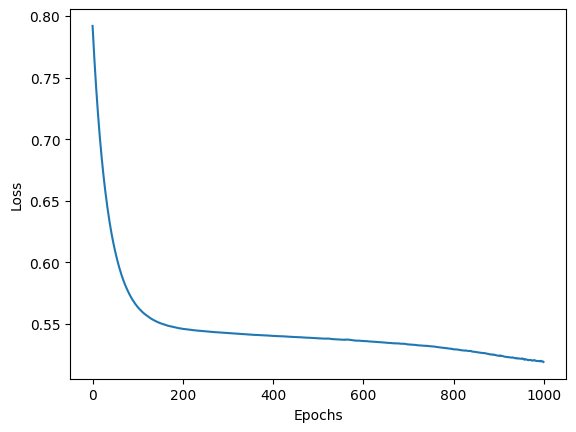

Training Losses are 
          0
0  0.626205
1  0.624091
2  0.622022
3  0.619987
4  0.618018
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


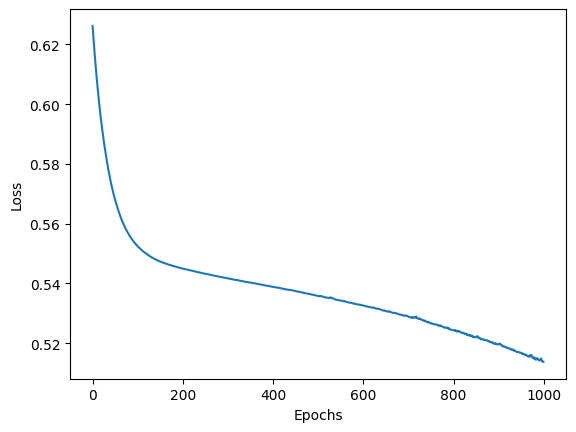

Training Losses are 
          0
0  0.737455
1  0.732254
2  0.727189
3  0.722291
4  0.717545
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


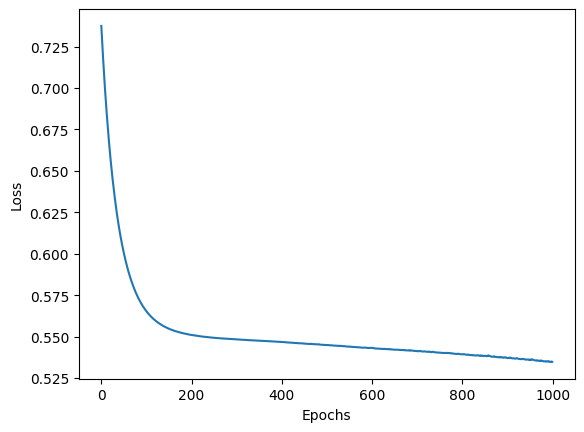

Training Losses are 
          0
0  0.620313
1  0.618532
2  0.616877
3  0.615262
4  0.613639
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


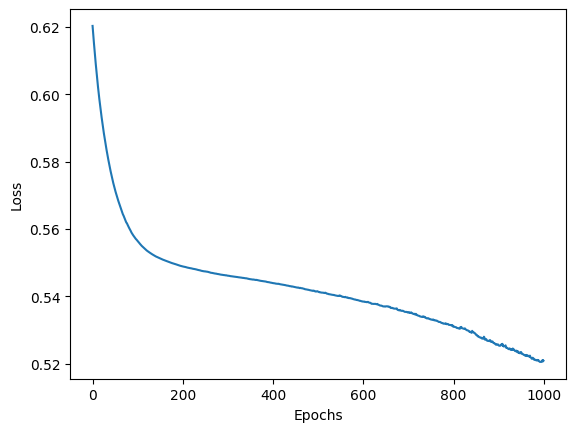

Training Losses are 
          0
0  0.656436
1  0.651559
2  0.646906
3  0.642471
4  0.638266
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


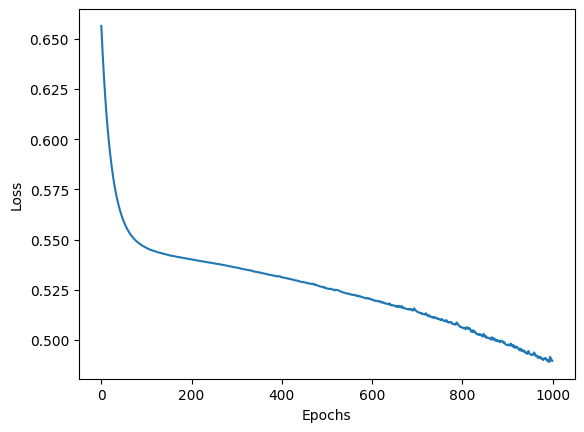

Training Losses are 
          0
0  0.802799
1  0.790450
2  0.778836
3  0.767808
4  0.757292
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


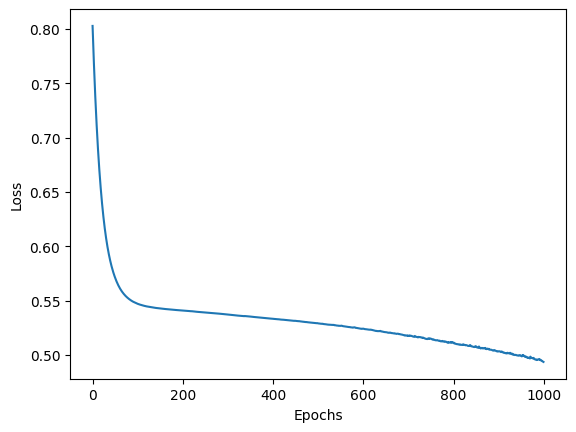

Training Losses are 
          0
0  0.833645
1  0.818925
2  0.805016
3  0.791885
4  0.779413
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


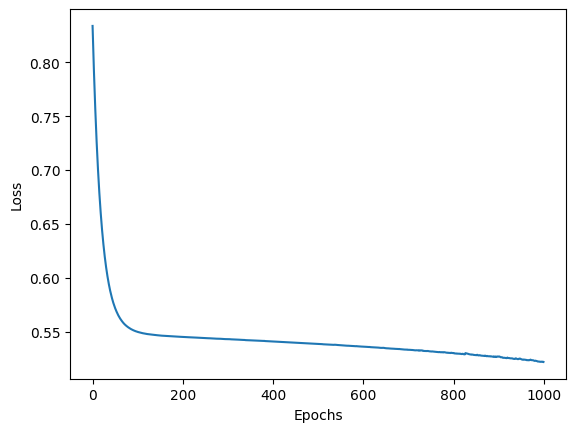

Training Losses are 
          0
0  0.802585
1  0.789737
2  0.777499
3  0.765946
4  0.754980
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


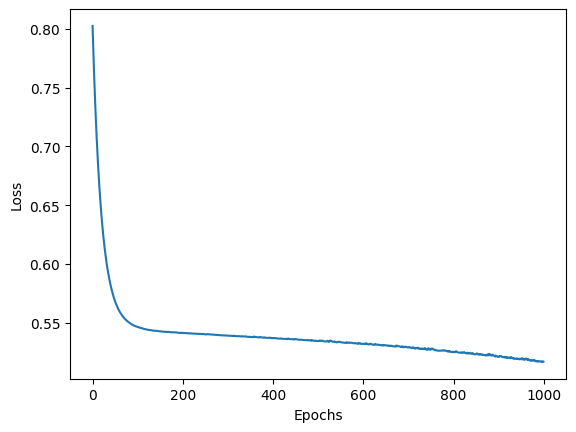

Training Losses are 
          0
0  0.611746
1  0.607003
2  0.602616
3  0.598574
4  0.594888
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


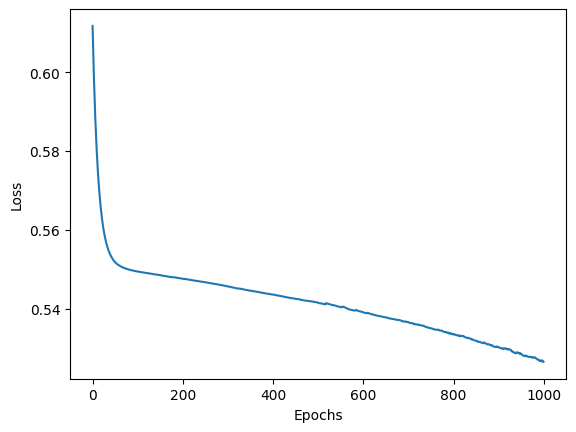

Training Losses are 
          0
0  0.901737
1  0.873811
2  0.848053
3  0.824272
4  0.802453
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


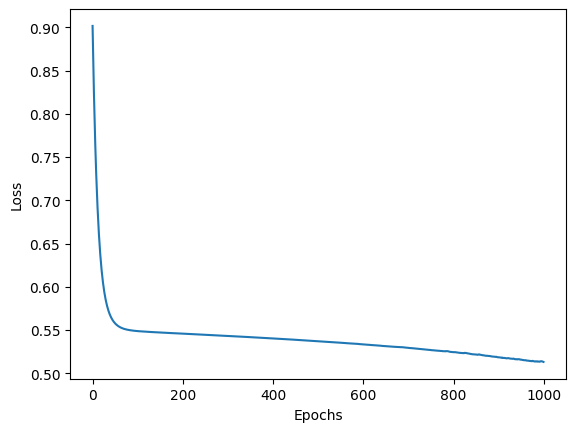

Training Losses are 
          0
0  0.622437
1  0.616299
2  0.610683
3  0.605545
4  0.600950
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


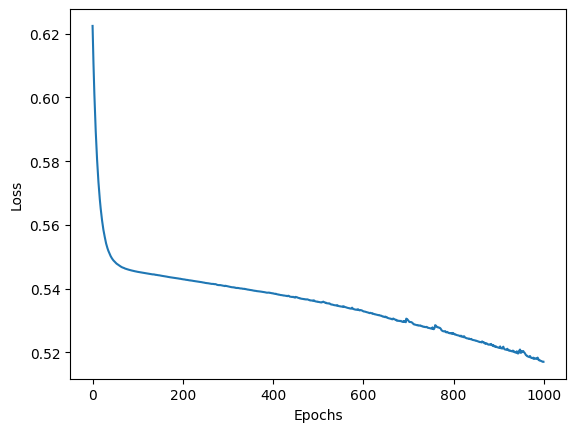

Training Losses are 
          0
0  0.633177
1  0.626327
2  0.620072
3  0.614364
4  0.609147
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


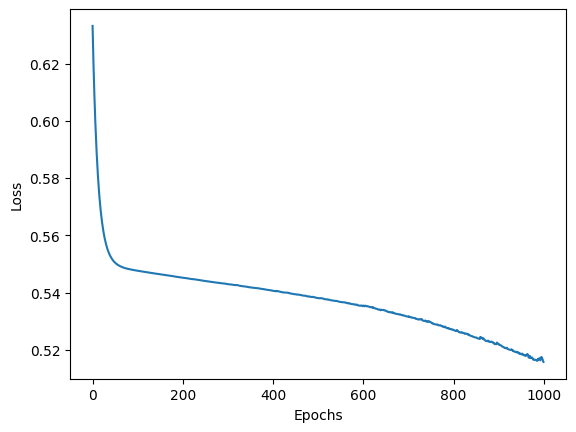

In [21]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(34,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()